In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Sep  5 14:08:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Pyeeg has been installed**

In [1]:
pip install git+https://github.com/forrestbao/pyeeg.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-uw_2483l
  Running command git clone --filter=blob:none --quiet https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-uw_2483l
  Resolved https://github.com/forrestbao/pyeeg.git to commit a6c18bb093e4748f9d9c208535a6ae024a0802b8
  Preparing metadata (setup.py) ... done
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28131 sha256=42eeb8d13112c426728a1673fbb35e447b3def23137a6ea3ac69dbf5b6444328
  Stored in directory: /tmp/pip-ephem-wheel-cache-7r040h4b/wheels/02/0f/b5/0e73a338ada620e317155ff2d303ad839ec1e468e903f7e8a0
Successfully built pyeeg


**Here is the code for mounting google drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyeeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Imported the necessery library packages**

In [4]:
import numpy as np
import pyeeg as pe
import pickle as pickle
import pandas as pd
import math

from sklearn import svm
from sklearn.preprocessing import normalize

import os
import time

**Location of dat file and location for where to save preprocessed npy files**

In [ ]:
path_to_dataset_2 = '/content/drive/Shareddrives/DEAP EEG/Dataset/physiological_recordings/data_preprocessed_python/' #Location of dat file of DEAP dataset
path_to_dataset = '/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/preprocessed_npy/mRMR_1to12_electrodes/' #where to save preprocessed npy files

**Intialize the channel array, band array, window_size, step_size and sample_rate and set the path of dataset of google drive.**

mRMR optimal 12 electrodes are: 4
30
14
21
25
8
13
1
17
32
11
19

1
4
8
11
13
14
17
19
21
25
30
32

In [ ]:
channel = [1,4,8,11,13,14,17,19,21,25,30,32] #mRMR optimal 12 electrodes
band = [4,8,12,16,25,45] #5 bands

window_size = 256 #Averaging band power of 2 sec

step_size = 16 #Each 0.125 sec update once

sample_rate = 128 #Sampling rate of 128 Hz

subjectList=[] #taking an empty array to store subject numbers here
for i in range(1,33):
  if i<10:
     subjectList.append(f"{i:02d}") #to add extra '0' infront of 1 to 9 single digits
  else:
    subjectList.append(f"{i:2d}")


relieff optimal 12 electrodes are:13
21
1
11
17
3
32
30
15
4
26
24

In [ ]:
channel = [13,21,1,11,17,3,32,30,15,4,26,24] #relieff optimal 12 electrodes
band = [4,8,12,16,25,45] #5 bands

window_size = 256 #Averaging band power of 2 sec

step_size = 16 #Each 0.125 sec update once

sample_rate = 128 #Sampling rate of 128 Hz

subjectList=[] #taking an empty array to store subject numbers here
for i in range(1,33):
  if i<10:
     subjectList.append(f"{i:02d}") #to add extra '0' infront of 1 to 9 single digits
  else:
    subjectList.append(f"{i:2d}")

vaishali optimal 4 electrodes are: 1
2
17
18

In [ ]:
channel = [1,2,17,18] #vaishali optimal 4 electrodes
band = [4,8,12,16,25,45] #5 bands

window_size = 256 #Averaging band power of 2 sec

step_size = 16 #Each 0.125 sec update once

sample_rate = 128 #Sampling rate of 128 Hz

subjectList=[] #taking an empty array to store subject numbers here
for i in range(1,33):
  if i<10:
     subjectList.append(f"{i:02d}") #to add extra '0' infront of 1 to 9 single digits
  else:
    subjectList.append(f"{i:2d}")

Zong Valence 8 electrodes are: 6
11
16
15
27
25
20
19

In [ ]:
channel = [6,11,16,15,27,25,20,19] #Zong Valence 8 electrodes
band = [4,8,12,16,25,45] #5 bands

window_size = 256 #Averaging band power of 2 sec

step_size = 16 #Each 0.125 sec update once

sample_rate = 128 #Sampling rate of 128 Hz

subjectList=[] #taking an empty array to store subject numbers here
for i in range(1,33):
  if i<10:
     subjectList.append(f"{i:02d}") #to add extra '0' infront of 1 to 9 single digits
  else:
    subjectList.append(f"{i:2d}")

MDPI Relieff 10 electrodes are: 1
2
3
4
8
14
15
17
21
30

In [ ]:
channel = [1,2,3,4,8,14,15,17,21,30] #Zong Valence 8 electrodes
band = [4,8,12,16,25,45] #5 bands

window_size = 256 #Averaging band power of 2 sec

step_size = 16 #Each 0.125 sec update once

sample_rate = 128 #Sampling rate of 128 Hz

subjectList=[] #taking an empty array to store subject numbers here
for i in range(1,33):
  if i<10:
     subjectList.append(f"{i:02d}") #to add extra '0' infront of 1 to 9 single digits
  else:
    subjectList.append(f"{i:2d}")

MDPI NCA 10 electrodes are: 1
2
4
8
9
12
17
18
22
26

In [ ]:
channel = [1,2,4,8,9,12,17,18,22,26] #Zong Valence 8 electrodes
band = [4,8,12,16,25,45] #5 bands

window_size = 256 #Averaging band power of 2 sec

step_size = 16 #Each 0.125 sec update once

sample_rate = 128 #Sampling rate of 128 Hz

subjectList=[] #taking an empty array to store subject numbers here
for i in range(1,33):
  if i<10:
     subjectList.append(f"{i:02d}") #to add extra '0' infront of 1 to 9 single digits
  else:
    subjectList.append(f"{i:2d}")

FP1

In [ ]:
channel = [3]
band = [4,8,12,16,25,45] #5 bands

window_size = 256 #Averaging band power of 2 sec

step_size = 16 #Each 0.125 sec update once

sample_rate = 128 #Sampling rate of 128 Hz

subjectList=[] #taking an empty array to store subject numbers here
for i in range(1,33):
  if i<10:
     subjectList.append(f"{i:02d}") #to add extra '0' infront of 1 to 9 single digits
  else:
    subjectList.append(f"{i:2d}")

IEEE 8 electrodes : 27
3
21
1
32
12
8
26

In [ ]:
channel = [27,3,21,1,32,12,8,26] #IEEE 8 electrodes
band = [4,8,12,16,25,45] #5 bands

window_size = 256 #Averaging band power of 2 sec

step_size = 16 #Each 0.125 sec update once

sample_rate = 128 #Sampling rate of 128 Hz

subjectList=[] #taking an empty array to store subject numbers here
for i in range(1,33):
  if i<10:
     subjectList.append(f"{i:02d}") #to add extra '0' infront of 1 to 9 single digits
  else:
    subjectList.append(f"{i:2d}")

CNNSE 7 Electrodes: 32
1
2
17
23
20
16

In [ ]:
channel = [32,1,2,17,23,20,16] #CNNSE 7 electrodes
band = [4,8,12,16,25,45] #5 bands

window_size = 256 #Averaging band power of 2 sec

step_size = 16 #Each 0.125 sec update once

sample_rate = 128 #Sampling rate of 128 Hz

subjectList=[] #taking an empty array to store subject numbers here
for i in range(1,33):
  if i<10:
     subjectList.append(f"{i:02d}") #to add extra '0' infront of 1 to 9 single digits
  else:
    subjectList.append(f"{i:2d}")

Parietal 9 electrodes are: 9
10
28
27
12
11
16
29
30

In [ ]:
channel = [9,10,28,27,12,11,16,29,30] #Parietal 9 electrodes
band = [4,8,12,16,25,45] #5 bands

window_size = 256 #Averaging band power of 2 sec

step_size = 16 #Each 0.125 sec update once

sample_rate = 128 #Sampling rate of 128 Hz

subjectList=[] #taking an empty array to store subject numbers here
for i in range(1,33):
  if i<10:
     subjectList.append(f"{i:02d}") #to add extra '0' infront of 1 to 9 single digits
  else:
    subjectList.append(f"{i:2d}")

Temporal 2 electrodes are: 8, 26

In [ ]:
channel = [8,26] #Temporal 2 electrodes
band = [4,8,12,16,25,45] #5 bands

window_size = 256 #Averaging band power of 2 sec

step_size = 16 #Each 0.125 sec update once

sample_rate = 128 #Sampling rate of 128 Hz

subjectList=[] #taking an empty array to store subject numbers here
for i in range(1,33):
  if i<10:
     subjectList.append(f"{i:02d}") #to add extra '0' infront of 1 to 9 single digits
  else:
    subjectList.append(f"{i:2d}")

**Declaring FFT function. Taking the preprocessed dat file and converting it to a preprocessed npy file after FFT**

In [ ]:
def FFT_Processing (sub, channel, band, window_size, step_size, sample_rate):
    '''
    arguments:  string subject
                list channel indice
                list band
                int window size for FFT
                int step size for FFT
                int sample rate for FFT
    return:     void
    '''
    meta = []
    with open(path_to_dataset_2+'s' + sub + '.dat', 'rb') as file:

        subject = pickle.load(file, encoding='latin1') #resolve the python 2 data problem by encoding : latin1

        for i in range (0,40):
            # loop over 0-39 trails
            data = subject["data"][i]
            labels = subject["labels"][i]
            start = 0;

            while start + window_size < data.shape[1]:
                meta_array = []
                meta_data = [] #meta vector for analysis
                for j in channel:
                    X = data[j][start : start + window_size] #Slice raw data over 2 sec, at interval of 0.125 sec
                    Y = pe.bin_power(X, band, sample_rate) #FFT over 2 sec of channel j, in seq of theta, alpha, low beta, high beta, gamma
                    meta_data = meta_data + list(Y[0])

                meta_array.append(np.array(meta_data))
                meta_array.append(labels)

                meta.append(np.array(meta_array))    
                start = start + step_size
                
        meta = np.array(meta)
        np.save(path_to_dataset+'s' + sub, meta, allow_pickle=True, fix_imports=True) #saving each of the 32 files as npy after preprocessing

**Calling the FFT functions for each subjects**

In [ ]:
for subjects in subjectList:
    FFT_Processing (subjects, channel, band, window_size, step_size, sample_rate)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

##Dividing the Data into Training and Testing


#spliting and appending each npy into training, testing (75/25)
Dividing the 32 preprocessed npy file into data training, label training, data testing and label testing. Every npy file has 19520 rows and 4 columns which are valence, arousal, dominace and likings. Every npy file was divided by 4.

For each npy file

*   Training : 19520-4880=14640 (75%)
*   Testing : 19520/4=4880 (25%)

For training and testing
* The data training and label training both has 14640*32=468480 rows (75%)
* The data testing and label testing both has 4880*32=156160 rows (25%)









In [ ]:
data_training = []
label_training = []
data_testing = []
label_testing = []

for subjects in subjectList:

    with open(path_to_dataset + 's' + subjects + '.npy', 'rb') as file: 
        sub = np.load(file) # loading npy file
        for i in range (0,sub.shape[0]): # running loop over 19520 rows
            if i % 4 == 0: # 19520/4=4880 (25%)
                data_testing.append(sub[i][0])
                label_testing.append(sub[i][1])
            else: # 19520-4880=14640 (75%)
                data_training.append(sub[i][0])
                label_training.append(sub[i][1])

ValueError: ignored

In [ ]:
# restore np.load for future normal usage
np.load = np_load_old

NameError: ignored

**Saving the data training, label training, data testing and label testing into google drive**


In [ ]:
np.save(path_to_dataset + 'data_training', np.array(data_training), allow_pickle=True, fix_imports=True)
np.save(path_to_dataset + 'label_training', np.array(label_training), allow_pickle=True, fix_imports=True)
print("training dataset:", np.array(data_training).shape, np.array(label_training).shape)

np.save(path_to_dataset + 'data_testing', np.array(data_testing), allow_pickle=True, fix_imports=True)
np.save(path_to_dataset + 'label_testing', np.array(label_testing), allow_pickle=True, fix_imports=True)
print("testing dataset:", np.array(data_testing).shape, np.array(label_testing).shape)

training dataset: (468480, 10) (468480, 4)
testing dataset: (156160, 10) (156160, 4)


#For spliting the dataset to 1-22 and 23-32
Taking the npy file of participants 1-22 into training and 23-32 into testing. 

* Training 19520*22 = 429440 (68.75%)
* Testing 19520*10 = 195200 (31.25%)



In [ ]:
data_training = []
label_training = []
data_testing = []
label_testing = []

for subjects in subjectList:

 with open('/content/drive/Shareddrives/DEAP EEG/Preprocessed_data/' + 's' + subjects + '.npy', 'rb') as file:
  sub = np.load(file)
  print(subjects)
  print(sub.shape[0])
  if int(subjects)<23:
    for i in range (0,sub.shape[0]):    
       data_training.append(sub[i][0])
       label_training.append(sub[i][1])
  else: 
    for i in range (0,sub.shape[0]):
        data_testing.append(sub[i][0])
        label_testing.append(sub[i][1])

**Saving the data training, label training, data testing and label testing into google drive**

In [ ]:
np.save(path_to_dataset + 'data_training', np.array(data_training), allow_pickle=True, fix_imports=True)
np.save(path_to_dataset + 'label_training', np.array(label_training), allow_pickle=True, fix_imports=True)
print("training dataset:", np.array(data_training).shape, np.array(label_training).shape)

np.save(path_to_dataset + 'data_testing', np.array(data_testing), allow_pickle=True, fix_imports=True)
np.save(path_to_dataset + 'label_testing', np.array(label_testing), allow_pickle=True, fix_imports=True)
print("testing dataset:", np.array(data_testing).shape, np.array(label_testing).shape)

#Adding familiarity

**Location of preprocessed npy file is path_to_dataset with 4 labels (valence, arousal, dominance, likings) and location for where to save preprocessed npy files with 5 labels (valence, arousal, dominance, likings, familiarity) after adding familiarity**

In [ ]:
path_to_dataset = '/content/drive/Shareddrives/DEAP EEG/Preprocessed_data/dataset_87.5-12.5_split/'  #preprocessed npy file with 4 labels (valence, arousal, dominance, likings)
npy_with_familiar = '/content/drive/Shareddrives/DEAP EEG/Preprocessed_data/familiarity_test/' #where to save preprocessed npy files with 5 labels after adding familiarity

**Importing participant ratings csv where the familiarity of each participants along valence, arousal, dominance, likings, Participant_id, Trial, Experiment_id, Start_time are available**

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/DEAP EEG/Dataset/metadata/metadata_csv/participant_ratings.csv')
df #1280x9

,Participant_id,Trial,Experiment_id,Start_time,Valence,Arousal,Dominance,Liking,Familiarity
0,1,1,5,1695918,6.96,3.92,7.19,6.05,4.0
1,1,2,18,2714905,7.23,7.15,6.94,8.01,4.0
2,1,3,4,3586768,4.94,6.01,6.12,8.06,4.0
3,1,4,24,4493800,7.04,7.09,8.01,8.22,4.0
4,1,5,20,5362005,8.26,7.91,7.19,8.13,1.0
...,...,...,...,...,...,...,...,...,...
1275,32,36,1,30916115,8.13,4.83,9.00,4.87,2.0
1276,32,37,18,31703107,8.03,7.06,8.96,8.18,5.0
1277,32,38,3,32482079,8.05,7.09,8.86,7.08,5.0
1278,32,39,25,33248922,4.01,7.17,8.01,6.94,2.0


**Dropping unnecessary columns (Participant_id, Trial, Experiment_id, Start_time) and saving it into a new dataframe with 1280x5**

In [ ]:
df_familiarity = df.drop(columns =['Participant_id','Trial','Experiment_id','Start_time']) #dropping unnecessary columns
df_familiarity #40x5

,Valence,Arousal,Dominance,Liking,Familiarity
0,6.96,3.92,7.19,6.05,4.0
1,7.23,7.15,6.94,8.01,4.0
2,4.94,6.01,6.12,8.06,4.0
3,7.04,7.09,8.01,8.22,4.0
4,8.26,7.91,7.19,8.13,1.0
...,...,...,...,...,...
1275,8.13,4.83,9.00,4.87,2.0
1276,8.03,7.06,8.96,8.18,5.0
1277,8.05,7.09,8.86,7.08,5.0
1278,4.01,7.17,8.01,6.94,2.0


**Creating a function to add familiarity. This function will load the preprocossed npy file with 4 labels (valence, arousal, dominance, likings) and will check common values with df_familiarity dataframe. This function will execute for 29 files as familiarity is missing for participants 2,15 and 23. For every participants it will first merge the labels with df_familiarity and the results will be saved to a new npy file with 5 labels (valence, arousal, dominance, likings, familiarity)**

In [ ]:
def add_familiarity(path_to_dataset,npy_with_familiar,subjects,df_familiarity):
    with open(path_to_dataset+'s' + subjects + '.npy', 'rb') as file: #open preprocessed npy with 4 labels (valence, arousal, dominance, likings) 
      sub = np.load(file) #loading the npy file 19520x2. There is 2 column. 1 is for data and 1 is for label
    df2 = pd.DataFrame(sub) #converting the npy file into a dataframe

    df3=DataFrame(df2[1].tolist()) #spliting the label column into 4 separate column and saving it into a new dataframe 
    df3.columns =['Valence', 'Arousal', 'Dominance', 'Liking'] #giving the columns headers

    merge_df = pd.merge(df3, df_familiarity, on=['Valence','Arousal','Dominance','Liking'], how='left') #merging 2 dataframe based on common 4 column 

    merge_df['combined']= merge_df.values.tolist() #combining 5 columns into a single column called combined
    merge_df = merge_df.drop(columns =['Valence','Arousal','Dominance','Liking','Familiarity']) #droping 5 columns

    df2 = df2.drop(columns =[1]) #drop the original label column

    result = pd.concat([df2, merge_df], axis=1) #concating the combined column (5 labels) with data column 

    sub2 = result.to_numpy() #saving the result to a numpy

    np.save(npy_with_familiar+'s' + str(subjects), sub2, allow_pickle=True, fix_imports=True) #saving the result to a new npy

**Calling the add_familiarity function. This function will execute for 29 files as familiarity is missing for participants 2,15 and 23. There was no issue to add familiarity for 25 participants. But for participant 13,27 and 31 we had to remove duplicate ratings from there individual ratings becuase they rated 5 labels(valence, arousal, dominance, likings, familiarity) with same values in 2 different trials. And had to handle participant 30 differently becuase in 2 trails valence,arousal,dominace and likings ratings where same but familiarity was different**

In [ ]:
from pandas import Series, DataFrame

for subjects in subjectList: #This function will execute for 29 files as familiarity is missing for participants 2,15 and 23. 
  if (subjects == "02") or (subjects == "15") or (subjects == "23"): #skiping participant 2,15 and 23 because of missing familiarity
    pass
  elif (subjects == "13") or (subjects == "27") or (subjects == "31"): #handling participant 13,27 and 31 differently as they rated 5 labels same in some trials
      s_df = df.loc[df['Participant_id'] == int(subjects)] #selecting data for individual participant from participant ratings csv
      s_df = s_df.drop(columns =['Participant_id','Trial','Experiment_id','Start_time']) #dropping unnecessary columns
      s_df.drop_duplicates(keep='last',inplace=True) #remove duplicates among these 40 rows
      add_familiarity(path_to_dataset,npy_with_familiar,subjects,s_df) #calling the add familiarity function

  elif (subjects == "30"): #handling participant 30 differently becuase in 2 trails valence,arousal,dominace and likings ratings where same but familiarity was different
      s30_df = df.loc[df['Participant_id'] == 30] #selecting data for participant 30
      s30_df = s30_df.drop(columns =['Participant_id','Trial','Experiment_id','Start_time']) #dropping unnecessary columns
      s30_df.drop_duplicates(subset=['Valence','Arousal','Dominance','Liking'], keep='last',inplace=True) #this is for no. 30 participant only. becuase in 2 trails valence,arousal,dominace and likings ratings where same but familiarity was different

      add_familiarity(path_to_dataset,npy_with_familiar,subjects,s30_df)  #calling the add familiarity function      
  else: #this will excecute of the remaining 25 participants
      add_familiarity(path_to_dataset,npy_with_familiar,subjects,df_familiarity)  #calling the add familiarity function

##Spliting and appending each npy into training, testing (87.5/12.5) after adding familiarity

In [ ]:
subjectList = ['01','03','04','05','06','07','08','09','10','11','12','13','14','16','17','18','19','20','21','22','24','25','26','27','28','29','30','31','32']

In [ ]:
data_training = []
label_training = []
data_testing = []
label_testing = []

for subjects in subjectList:
  if (subjects == "02") or (subjects == "15") or (subjects == "23"): #passing subject 2,15,23 as familiarity is not available for them
    pass
  else:
    with open(npy_with_familiar + 's' + subjects + '.npy', 'rb') as file: 
        sub = np.load(file) # loading npy file
        for i in range (0,sub.shape[0]): # running loop over 19520 rows
            if i % 8 == 0: # 19520/8=2440 (12.5%)
                data_testing.append(sub[i][0])
                label_testing.append(sub[i][1])
            else: # 19520-2440=17080 (87.5%)
                data_training.append(sub[i][0])
                label_training.append(sub[i][1])

In [ ]:
np.save(npy_with_familiar + 'data_training', np.array(data_training), allow_pickle=True, fix_imports=True)
np.save(npy_with_familiar + 'label_training', np.array(label_training), allow_pickle=True, fix_imports=True)
print("training dataset:", np.array(data_training).shape, np.array(label_training).shape)

np.save(npy_with_familiar + 'data_testing', np.array(data_testing), allow_pickle=True, fix_imports=True)
np.save(npy_with_familiar + 'label_testing', np.array(label_testing), allow_pickle=True, fix_imports=True)
print("testing dataset:", np.array(data_testing).shape, np.array(label_testing).shape)

training dataset: (495320, 70) (495320, 5)
testing dataset: (70760, 70) (70760, 5)


#Loading the training file

**Here all the training file have been loaded .The data have been put in variable X and label values have been put in Y.Then the X has been Normalized and then valence label values have been loaded in Z. And then all the '9' values are converted into '8.99' of valence label.**

In [ ]:
with open(path_to_dataset + 'data_training.npy', 'rb') as fileTrain:
    X  = np.load(fileTrain)
    
with open(path_to_dataset + 'label_training.npy', 'rb') as fileTrainL:
    Y  = np.load(fileTrainL)
    
X = normalize(X)
Z = np.ravel(Y[:, [0]])

Valence_Train = np.ravel(Y[:, [0]])
Arousal_Train = np.ravel(Y[:, [1]])
Domain_Train = np.ravel(Y[:, [2]])
Like_Train = np.ravel(Y[:, [3]])

for i in range(len(Z)):
  if Z[i] == 9:
    Z[i] = 8.99

In [ ]:
count_0 = 0
count_1 = 0
for i in range(len(Z)):
  if Z[i] >= 1 and Z[i]<=4.99:
    Z [i] = 0
    count_0 = count_0 + 1
  else:
    Z [i] = 1
    count_1 = count_1 + 1
print(count_0,count_1)

203496 264984


**Necessery libraries are imported**


In [ ]:
import pandas as pd
import keras.backend as K
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from tensorflow.keras.utils import to_categorical 
import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Model
import timeit
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution1D, MaxPooling1D, ZeroPadding1D
import warnings
warnings.filterwarnings('ignore')
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation
from keras.regularizers import l2
from keras.layers import Input
from keras.layers.merge import concatenate
from keras.layers import Input
from keras.utils.vis_utils import plot_model

**Here all the training label values are categorised. For binary classification and it is catagorised into two catagory. value range 1 - 4.99 have been assigned in catagory '0' and rest of the value are assigned in catagory '1'.** 

1.  1-4.99 ----> catagory(0)
2.  5-8.99 ----> catagory(1)

In [ ]:
y_train = to_categorical(Z)
y_train[:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

**Values of X are put in x_train as numpy array format**

In [ ]:
x_train = np.array(X[:])

**Here all the testing file have been loaded .The data have been put in variable M and label values have been put in N.Then the M has been Normalized and then valence label values have been loaded in L. And then all the '9' values are converted into '8.99' of valence label.**

In [ ]:
with open(path_to_dataset + 'data_testing.npy', 'rb') as fileTrain:
    M  = np.load(fileTrain)
    
with open(path_to_dataset + 'label_testing.npy', 'rb') as fileTrainL:
    N  = np.load(fileTrainL)

M = normalize(M)
L = np.ravel(N[:, [0]])


Valence_Test = np.ravel(N[:, [0]])
Arousal_Test = np.ravel(N[:, [1]])
Domain_Test = np.ravel(N[:, [2]])
Like_Test = np.ravel(N[:, [3]])

for i in range(len(L)):
  if L[i] == 9:
    L[i] = 8.99

**All the testing labels values are divided into two segments. One segment contains values from 1 - 4.9 and another contains rest of the range's values. This approch is maintained for valence, arousal, dominance, likings binary classifications but not for other class classification.**

In [ ]:
count_0 = 0
count_1 = 0
for i in range(len(L)):
  if L[i] >= 1 and L[i]<=4.99:
    L [i] = 0
    count_0 = count_0 + 1
  else:
    L [i] = 1
    count_1 = count_1 + 1
print(count_0,count_1)

67832 88328


**Vules of M are assigned in x_test in numpy array format**

In [ ]:
x_test = np.array(M[:])
x_test

array([[0.05815479, 0.09525852, 0.0809324 , ..., 0.08989219, 0.19430403,
        0.16034992],
       [0.04238223, 0.08626945, 0.07359552, ..., 0.09124414, 0.18257985,
        0.15998906],
       [0.05646878, 0.090468  , 0.07727157, ..., 0.10154052, 0.15272005,
        0.15069009],
       ...,
       [0.05071543, 0.04135578, 0.02518657, ..., 0.04021445, 0.05863386,
        0.1300702 ],
       [0.05435894, 0.04460746, 0.02762419, ..., 0.04175659, 0.05647033,
        0.12827914],
       [0.05946463, 0.05153709, 0.03173674, ..., 0.04402586, 0.05683763,
        0.16258862]])

**Here all the tessting labels values are categorised. For binary classification and it is catagorised into two catagory. value range 1 - 4.99 have been assigned in catagory '0' and rest of the value are assigned in catagory '1'.**

* 1-4.99 ----> catagory(0)
* 5-8.99 ----> catagory(1)

In [ ]:
from tensorflow.keras.utils import to_categorical 
y_test = to_categorical(L)

**Fit the train and test data with StandarScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

**Two dimensional data are converted into three dimension by adding one constant dimension’s value '1'**

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

**Here define the batch_size, number of class used in model architecture ,how many epoch will be run with the model and also define the input_shape.**

In [ ]:
batch_size = 256
#num_classes = 2
epochs = 50

input_shape=(x_train.shape[1], 1)

## Residual Connection Example Network

# Example 1

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 70, 1)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 70, 1024)     7168        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 70, 1024)    4096        ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 35, 1024)     0           ['batch_normalization[0][0]']

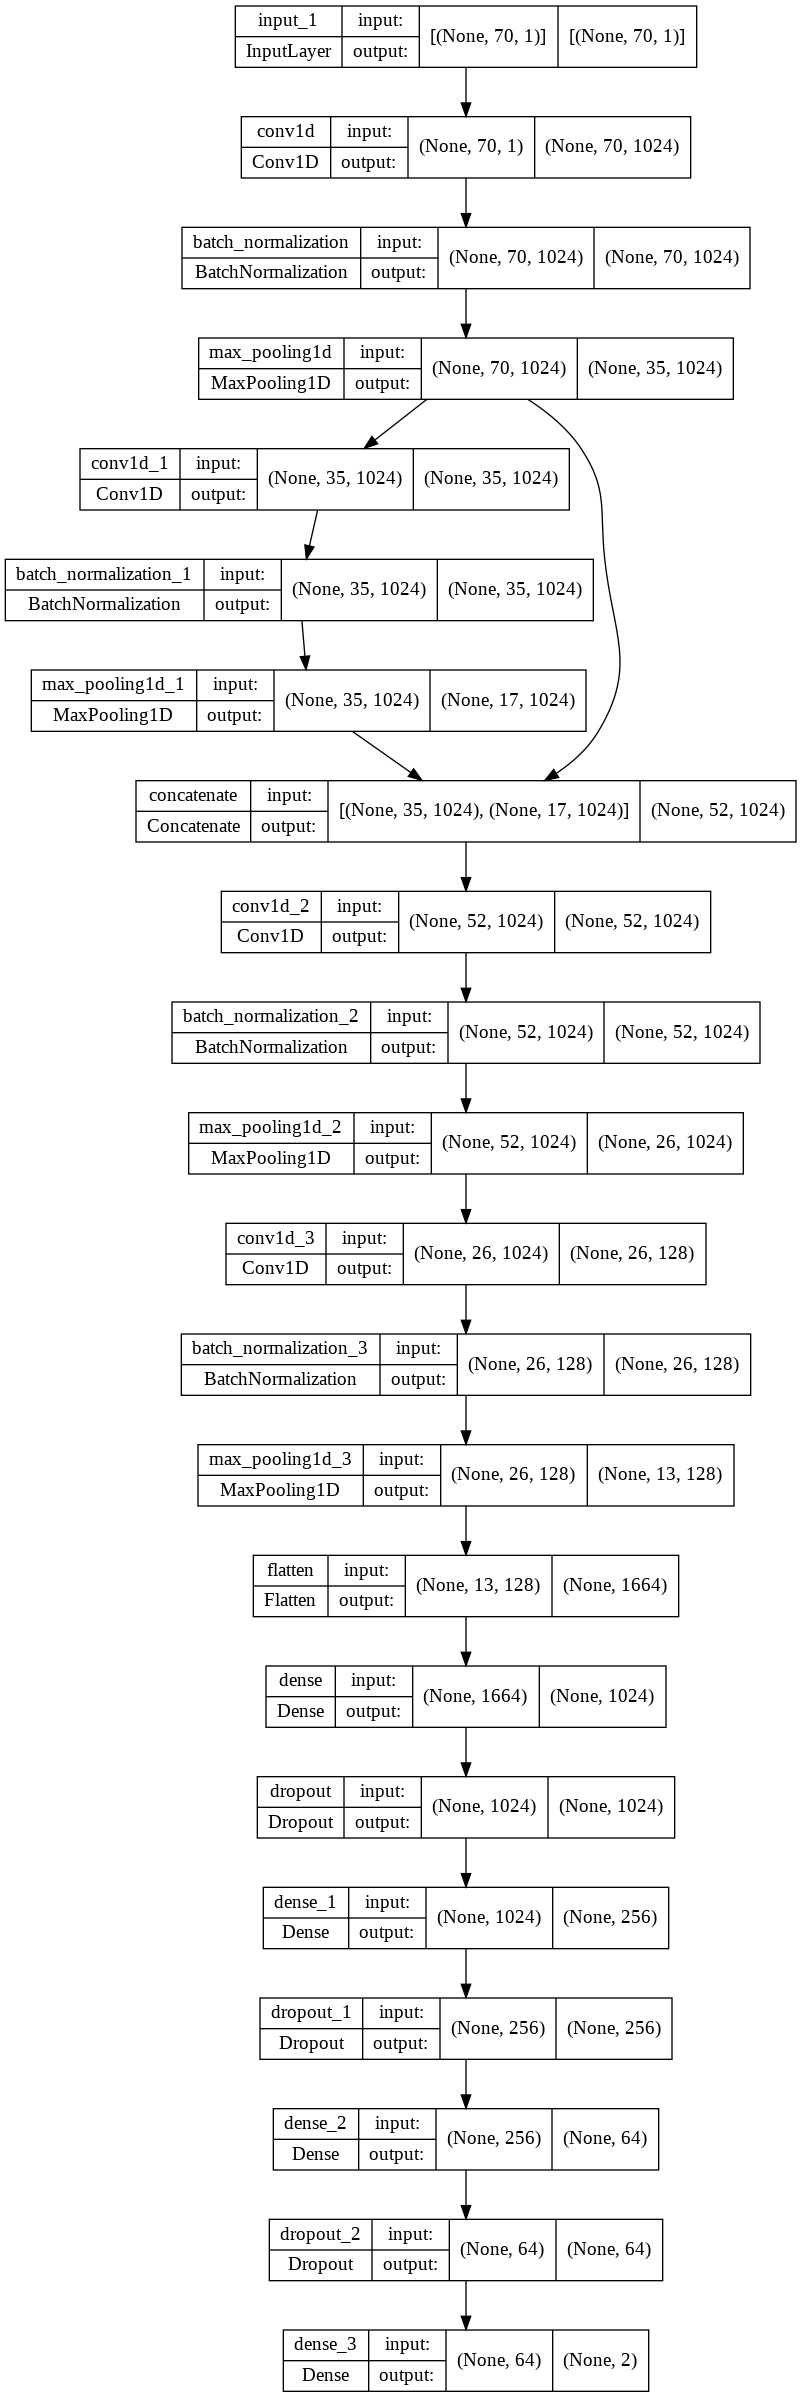

In [ ]:
intput_shape=(70, 1) #x_train.shape[1]

input_layer = Input(intput_shape)

conv1 = Conv1D(1024, kernel_size=6,padding = 'same',activation='relu') (input_layer)
bn1 = BatchNormalization() (conv1)
pool1 = MaxPooling1D(pool_size=(2)) (bn1)

conv2 = Conv1D(1024,kernel_size=6,padding = 'same', activation='relu') (pool1)
bn2 = BatchNormalization() (conv2) 
pool2 = MaxPooling1D(pool_size=(2)) (bn2)

connect1 = concatenate([pool1, pool2], axis = 1)

conv3 = Conv1D(1024,kernel_size=6,padding = 'same', activation='relu') (connect1)
bn3 = BatchNormalization() (conv3)
pool3 = MaxPooling1D(pool_size=(2)) (bn3)

conv4 = Conv1D(128,kernel_size=6,padding = 'same', activation='relu') (pool3)
bn4 = BatchNormalization() (conv4)
pool4 = MaxPooling1D(pool_size=(2)) (bn4)

flat = Flatten() (pool4)

dense1 = Dense(1024, activation='relu') (flat)
drop1 = Dropout(0.2) (dense1)

dense2 = Dense(256, activation='relu') (drop1)
drop2 = Dropout(0.2) (dense2)

dense3 = Dense(64, activation='relu') (drop2)
drop3 = Dropout(0.2) (dense3)

output_layer = Dense(2, activation='softmax') (drop3) #num_classes

model = Model(input_layer, output_layer)
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**Compiling the model**

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer='adam',
              metrics=['accuracy'])

#Example 2

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60, 1)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 60, 1024)     7168        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 60, 1024)    4096        ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 30, 1024)     0           ['batch_normalization[0][0]']

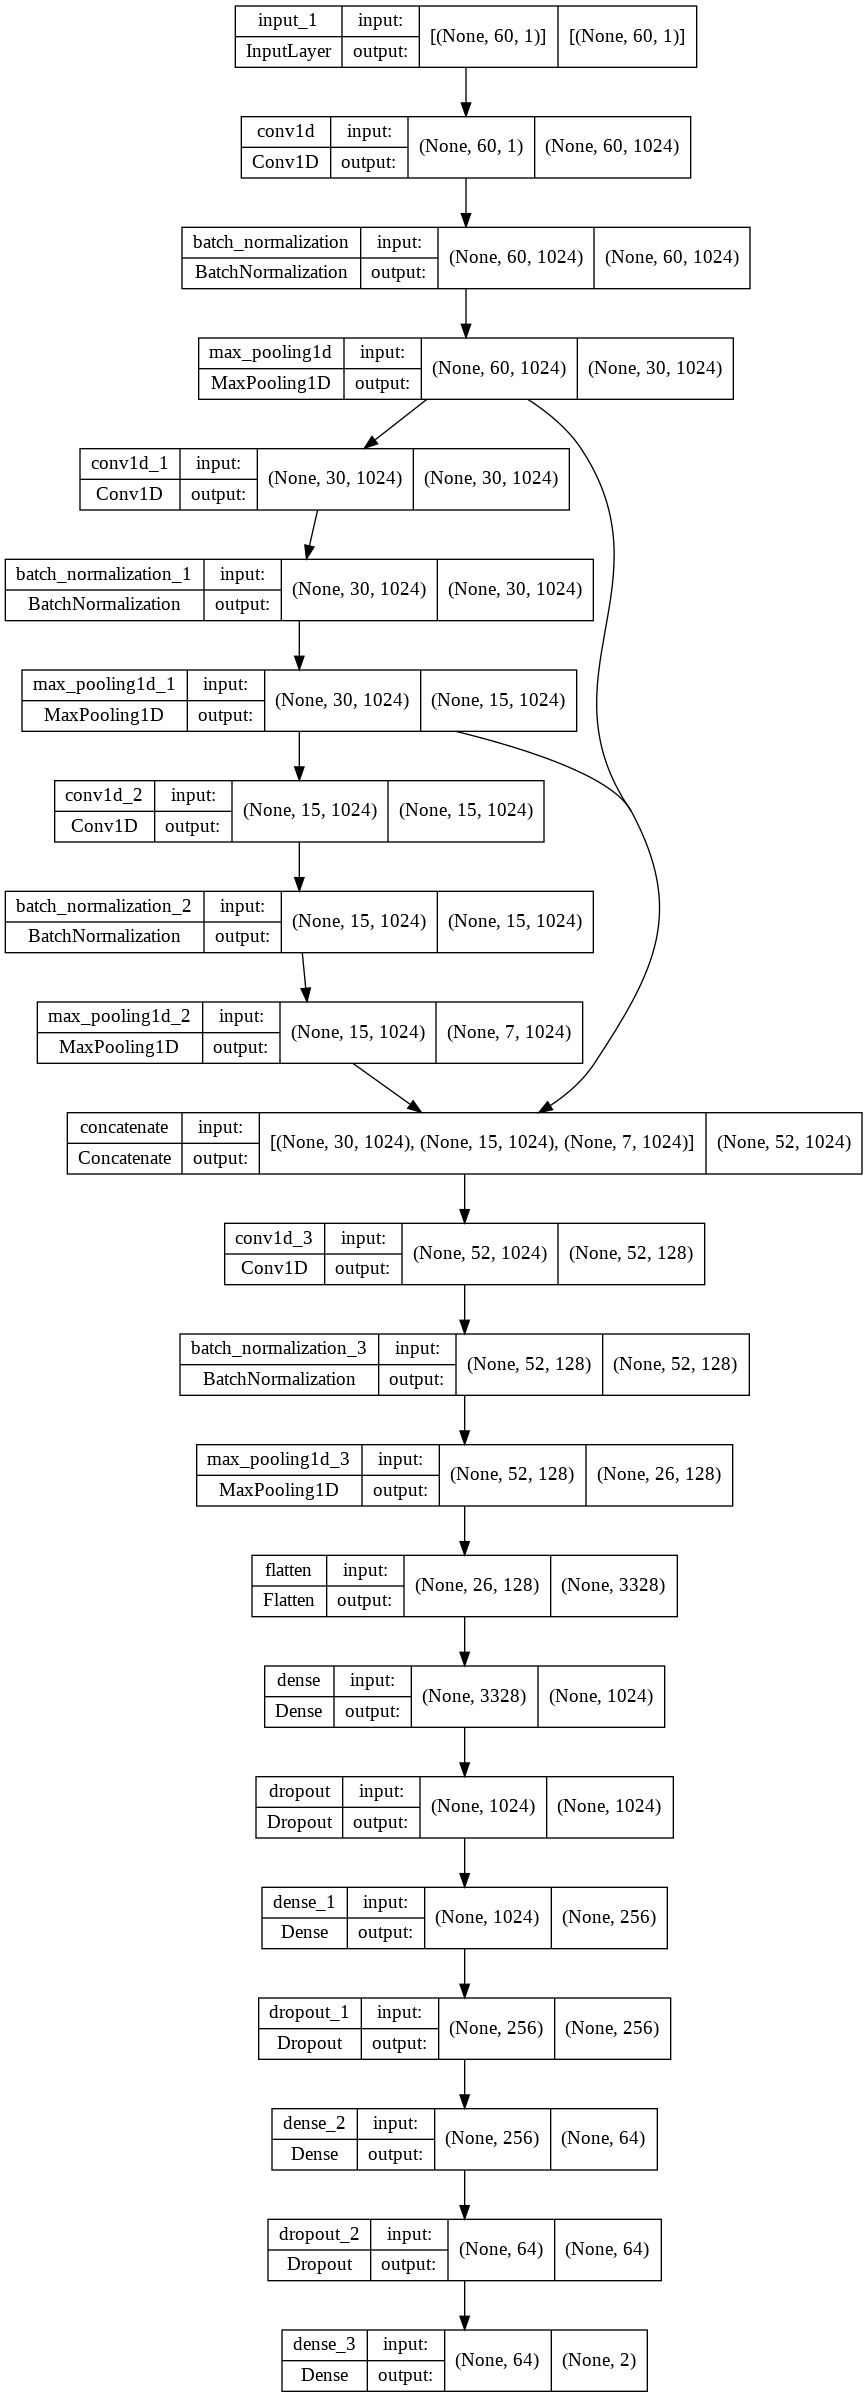

In [ ]:
from keras.layers import Input
from keras.layers.merge import concatenate
from keras.utils.vis_utils import plot_model


intput_shape=(60,1) #x_train.shape[1]

input_layer = Input(intput_shape)

conv1 = Conv1D(1024, kernel_size=6,padding = 'same',activation='relu') (input_layer)
bn1 = BatchNormalization() (conv1)
pool1 = MaxPooling1D(pool_size=(2)) (bn1)

conv2 = Conv1D(1024,kernel_size=6,padding = 'same', activation='relu') (pool1)
bn2 = BatchNormalization() (conv2) 
pool2 = MaxPooling1D(pool_size=(2)) (bn2)


conv3 = Conv1D(1024,kernel_size=6,padding = 'same', activation='relu') (pool2)
bn3 = BatchNormalization() (conv3)
pool3 = MaxPooling1D(pool_size=(2)) (bn3)

connect1 = concatenate([pool1, pool2, pool3], axis=1)

conv4 = Conv1D(128,kernel_size=6,padding = 'same', activation='relu') (connect1)
bn4 = BatchNormalization() (conv4)
pool4 = MaxPooling1D(pool_size=(2)) (bn4)

flat = Flatten() (pool4)

dense1 = Dense(1024, activation='relu') (flat)
drop1 = Dropout(0.2) (dense1)

dense2 = Dense(256, activation='relu') (drop1)
drop2 = Dropout(0.2) (dense2)

dense3 = Dense(64, activation='relu') (drop2)
drop3 = Dropout(0.2) (dense3)

output_layer = Dense(2, activation='softmax') (drop3) #num_classes

model = Model(input_layer, output_layer)
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**Compiling the model**

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer='adam',
              metrics=['accuracy'])

This model is only for 1 electrode

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 5, 1)]       0           []                               
                                                                                                  
 conv1d_13 (Conv1D)             (None, 5, 1024)      7168        ['input_5[0][0]']                
                                                                                                  
 batch_normalization_13 (BatchN  (None, 5, 1024)     4096        ['conv1d_13[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 max_pooling1d_13 (MaxPooling1D  (None, 5, 1024)     0           ['batch_normalization_13[0]

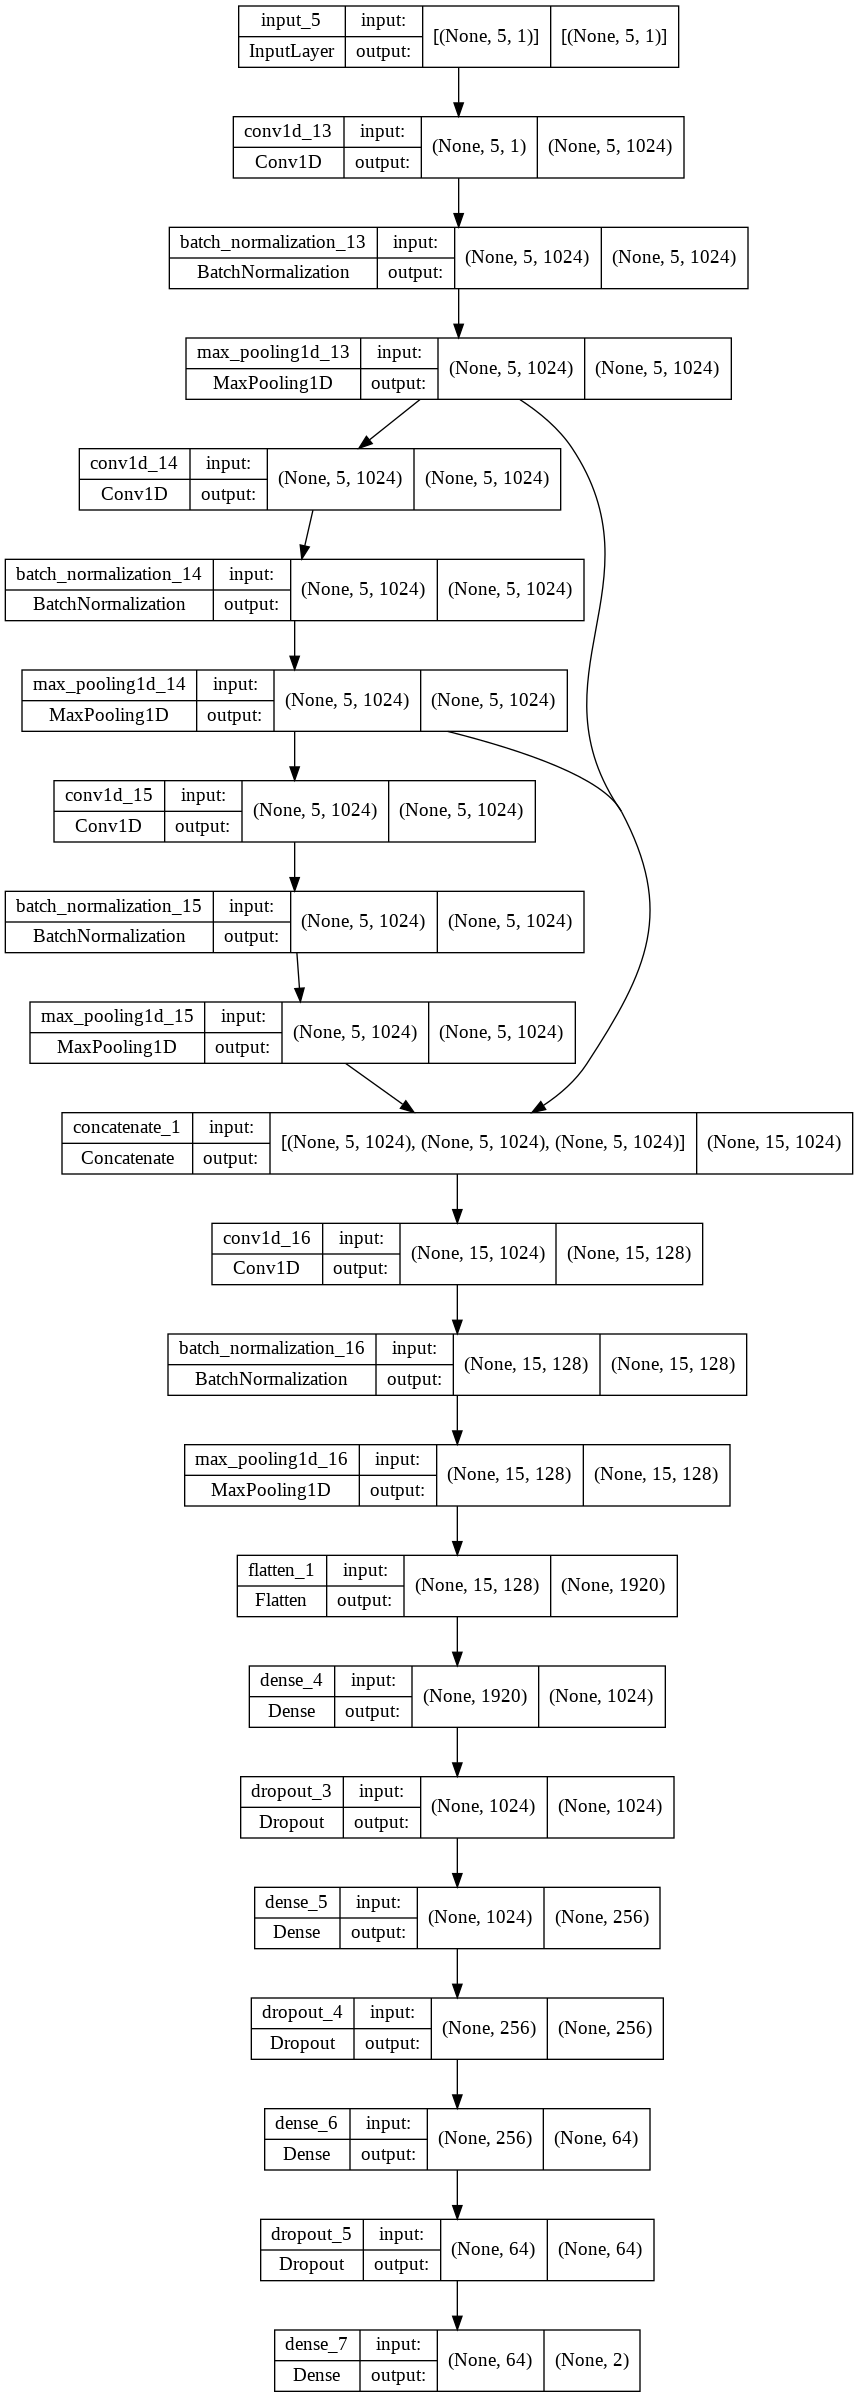

In [ ]:
from keras.layers import Input
from keras.layers.merge import concatenate
from keras.utils.vis_utils import plot_model


intput_shape=(5,1) #x_train.shape[1]

input_layer = Input(intput_shape)

conv1 = Conv1D(1024, kernel_size=6,padding = 'same',activation='relu') (input_layer)
bn1 = BatchNormalization() (conv1)
pool1 = MaxPooling1D(pool_size=(1)) (bn1)

conv2 = Conv1D(1024,kernel_size=6,padding = 'same', activation='relu') (pool1)
bn2 = BatchNormalization() (conv2) 
pool2 = MaxPooling1D(pool_size=(1)) (bn2)


conv3 = Conv1D(1024,kernel_size=6,padding = 'same', activation='relu') (pool2)
bn3 = BatchNormalization() (conv3)
pool3 = MaxPooling1D(pool_size=(1)) (bn3)

connect1 = concatenate([pool1, pool2, pool3], axis=1)

conv4 = Conv1D(128,kernel_size=6,padding = 'same', activation='relu') (connect1)
bn4 = BatchNormalization() (conv4)
pool4 = MaxPooling1D(pool_size=(1)) (bn4)

flat = Flatten() (pool4)

dense1 = Dense(1024, activation='relu') (flat)
drop1 = Dropout(0.2) (dense1)

dense2 = Dense(256, activation='relu') (drop1)
drop2 = Dropout(0.2) (dense2)

dense3 = Dense(64, activation='relu') (drop2)
drop3 = Dropout(0.2) (dense3)

output_layer = Dense(2, activation='softmax') (drop3) #num_classes

model = Model(input_layer, output_layer)
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer='adam',
              metrics=['accuracy'])

# Example 2.4 (multitask learning on model 2)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 70, 1)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 70, 1024)     7168        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 70, 1024)    4096        ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 35, 1024)     0           ['batch_normalization[0][0]']

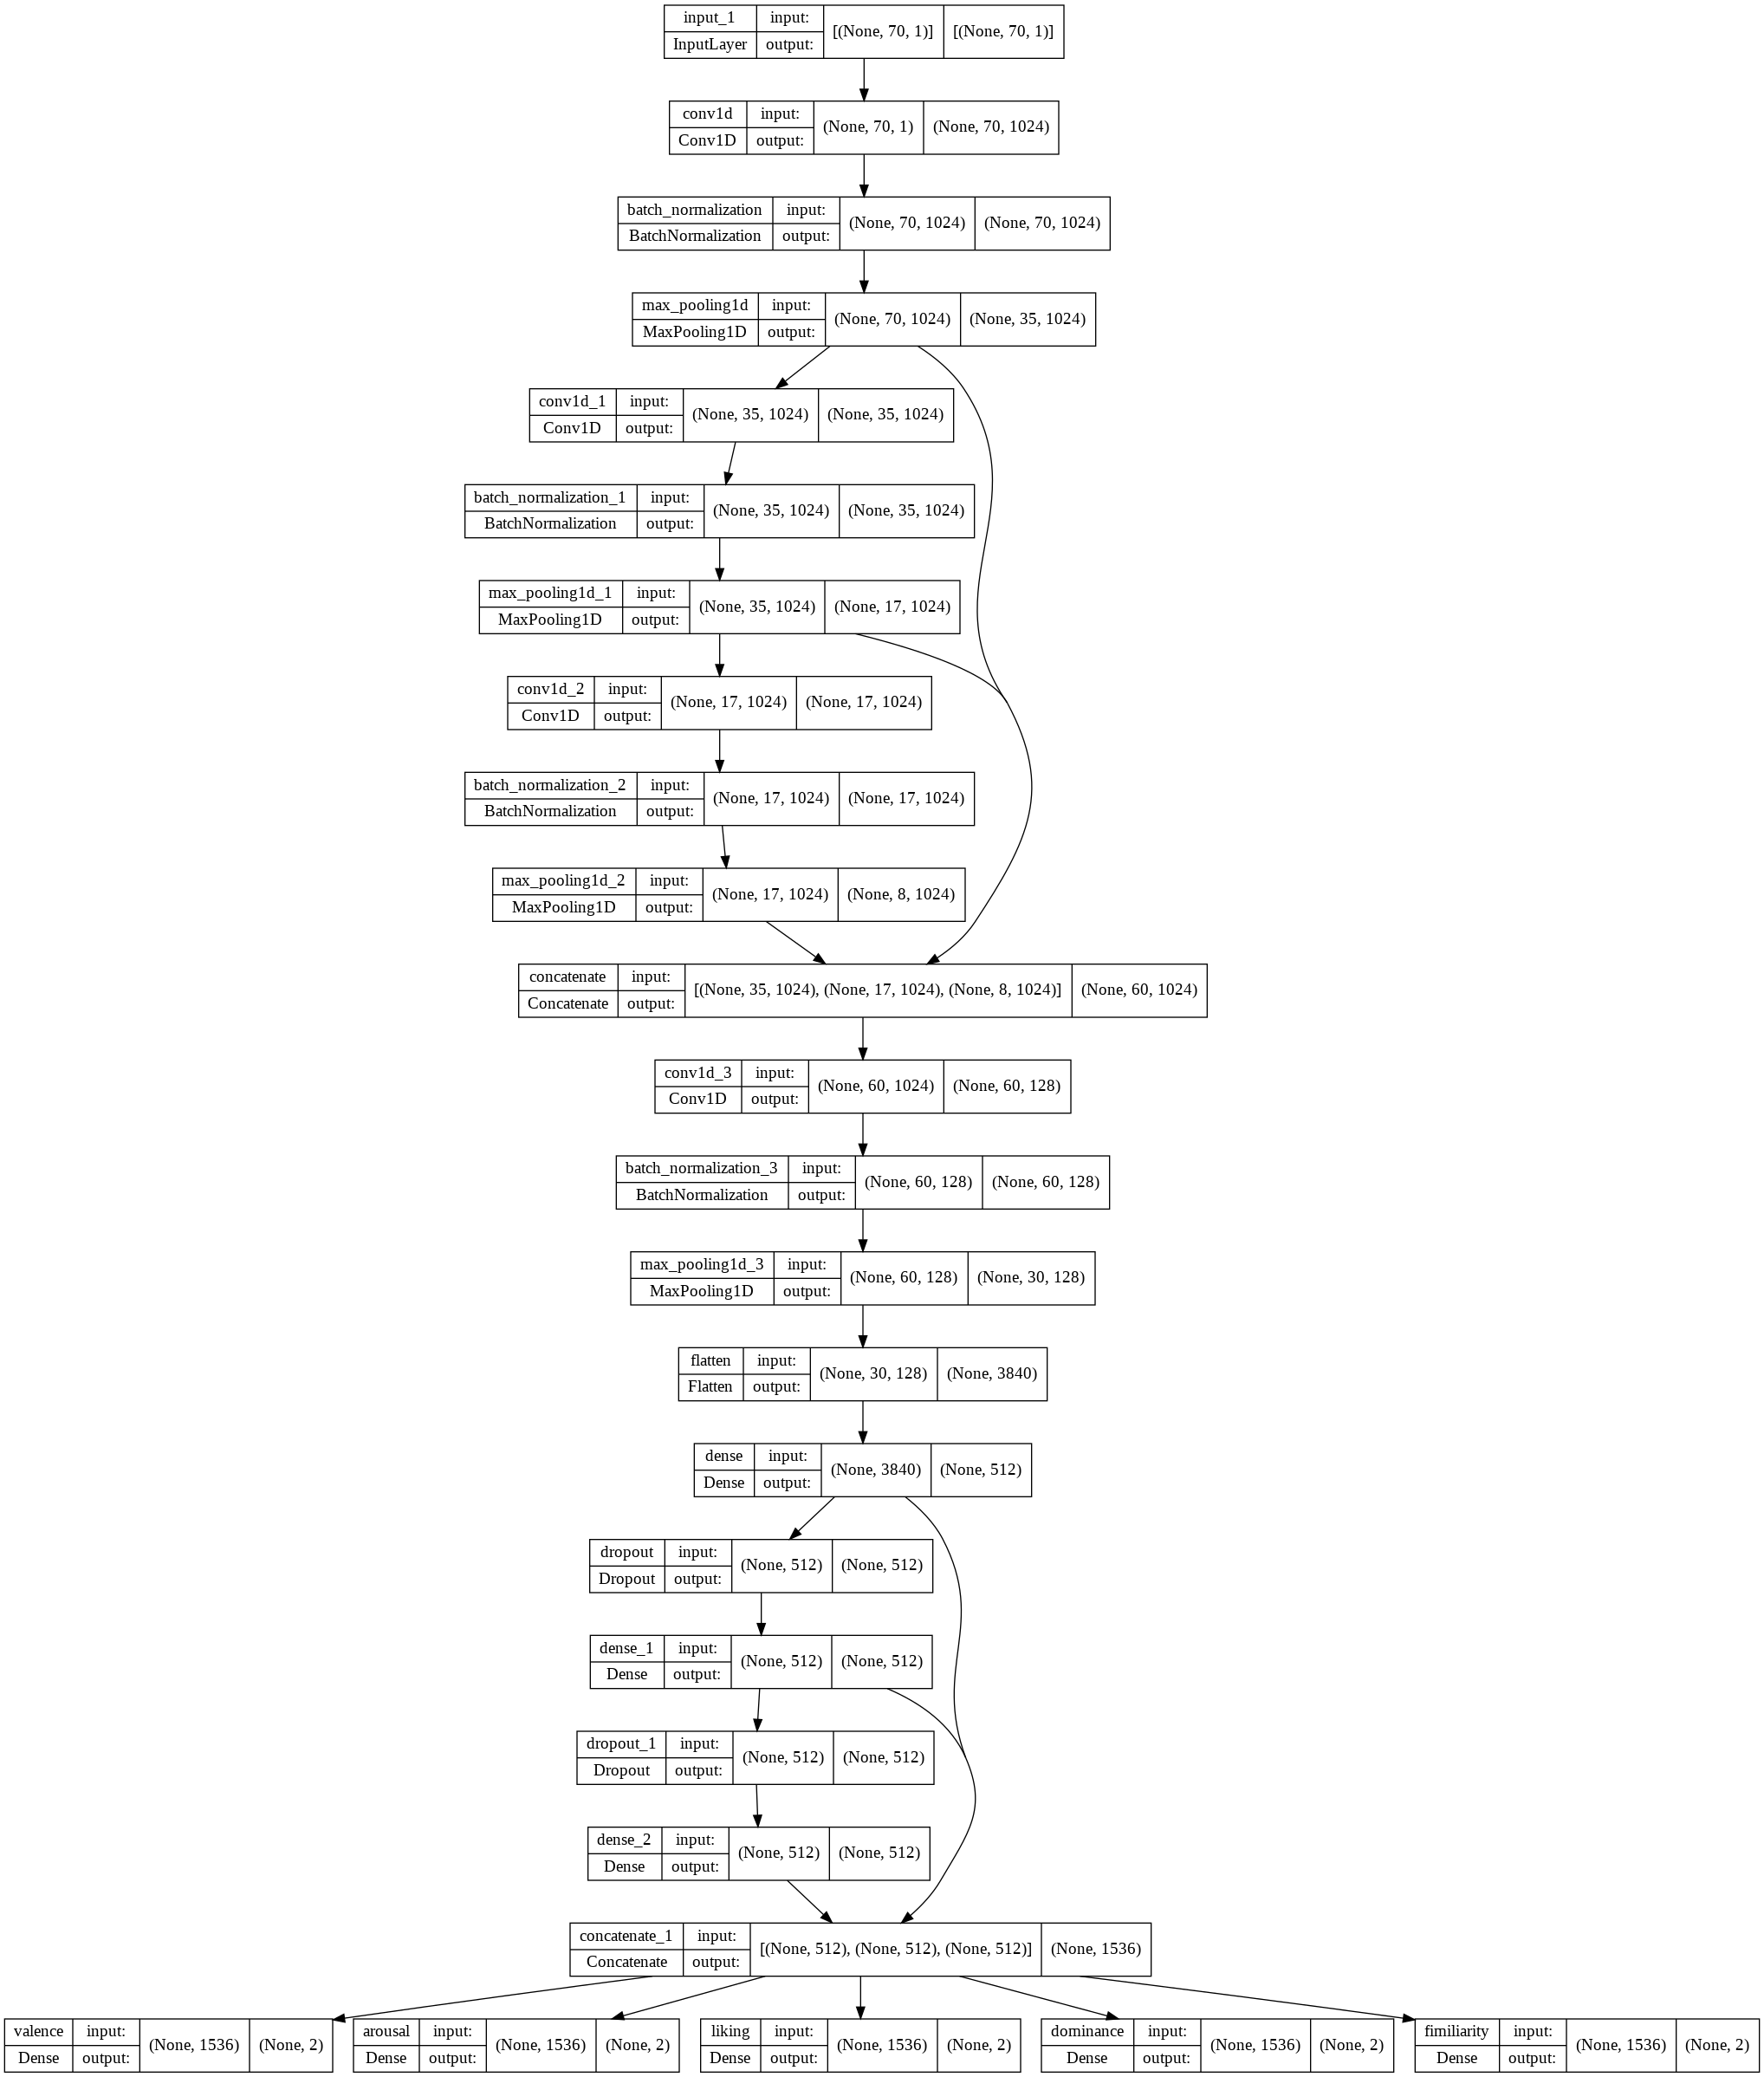

In [ ]:
from keras.layers import Input
from keras.layers.merge import concatenate
from keras.utils.vis_utils import plot_model


intput_shape=(70, 1) #x_train.shape[1]

input_layer = Input(intput_shape)

conv1 = Conv1D(1024, kernel_size=6,padding = 'same',activation='relu') (input_layer)
bn1 = BatchNormalization() (conv1)
pool1 = MaxPooling1D(pool_size=(2)) (bn1)

conv2 = Conv1D(1024,kernel_size=6,padding = 'same', activation='relu') (pool1)
bn2 = BatchNormalization() (conv2) 
pool2 = MaxPooling1D(pool_size=(2)) (bn2)


conv3 = Conv1D(1024,kernel_size=6,padding = 'same', activation='relu') (pool2)
bn3 = BatchNormalization() (conv3)
pool3 = MaxPooling1D(pool_size=(2)) (bn3)

connect1 = concatenate([pool1, pool2, pool3], axis=1)

conv4 = Conv1D(128,kernel_size=6,padding = 'same', activation='relu') (connect1)
bn4 = BatchNormalization() (conv4)
pool4 = MaxPooling1D(pool_size=(2)) (bn4)

flat = Flatten() (pool4)

dense1 = Dense(512, activation='relu') (flat)
drop1 = Dropout(0.3) (dense1)

dense2 = Dense(512, activation='relu') (drop1)
drop2 = Dropout(0.3) (dense2)

dense3 = Dense(512, activation='relu') (drop2)
drop3 = Dropout(0.3) (dense3)

connect4 = concatenate([dense1, dense2, dense3])

output_layer_val = Dense(2, activation='softmax', name = "valence") (connect4) #num_classes
output_layer_aro = Dense(2, activation='softmax', name= 'arousal') (connect4) #num_classes
output_layer_lik = Dense(2, activation='softmax', name = 'liking') (connect4) #num_classes
output_layer_dom = Dense(2, activation='softmax', name = 'dominance') (connect4) #num_classes
output_layer_fim = Dense(2, activation='softmax', name = 'fimiliarity') (connect4) #num_classes

model = Model(
    inputs = input_layer, 
    outputs = [output_layer_val, output_layer_aro, output_layer_lik, output_layer_dom, output_layer_fim])
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**Compiling the model**

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer='adam',
              metrics=['accuracy'])

#Example 3

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 70, 1)]      0           []                               
                                                                                                  
 conv1d_4 (Conv1D)              (None, 70, 512)      3584        ['input_2[0][0]']                
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 70, 512)     2048        ['conv1d_4[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 max_pooling1d_4 (MaxPooling1D)  (None, 35, 512)     0           ['batch_normalization_4[0][

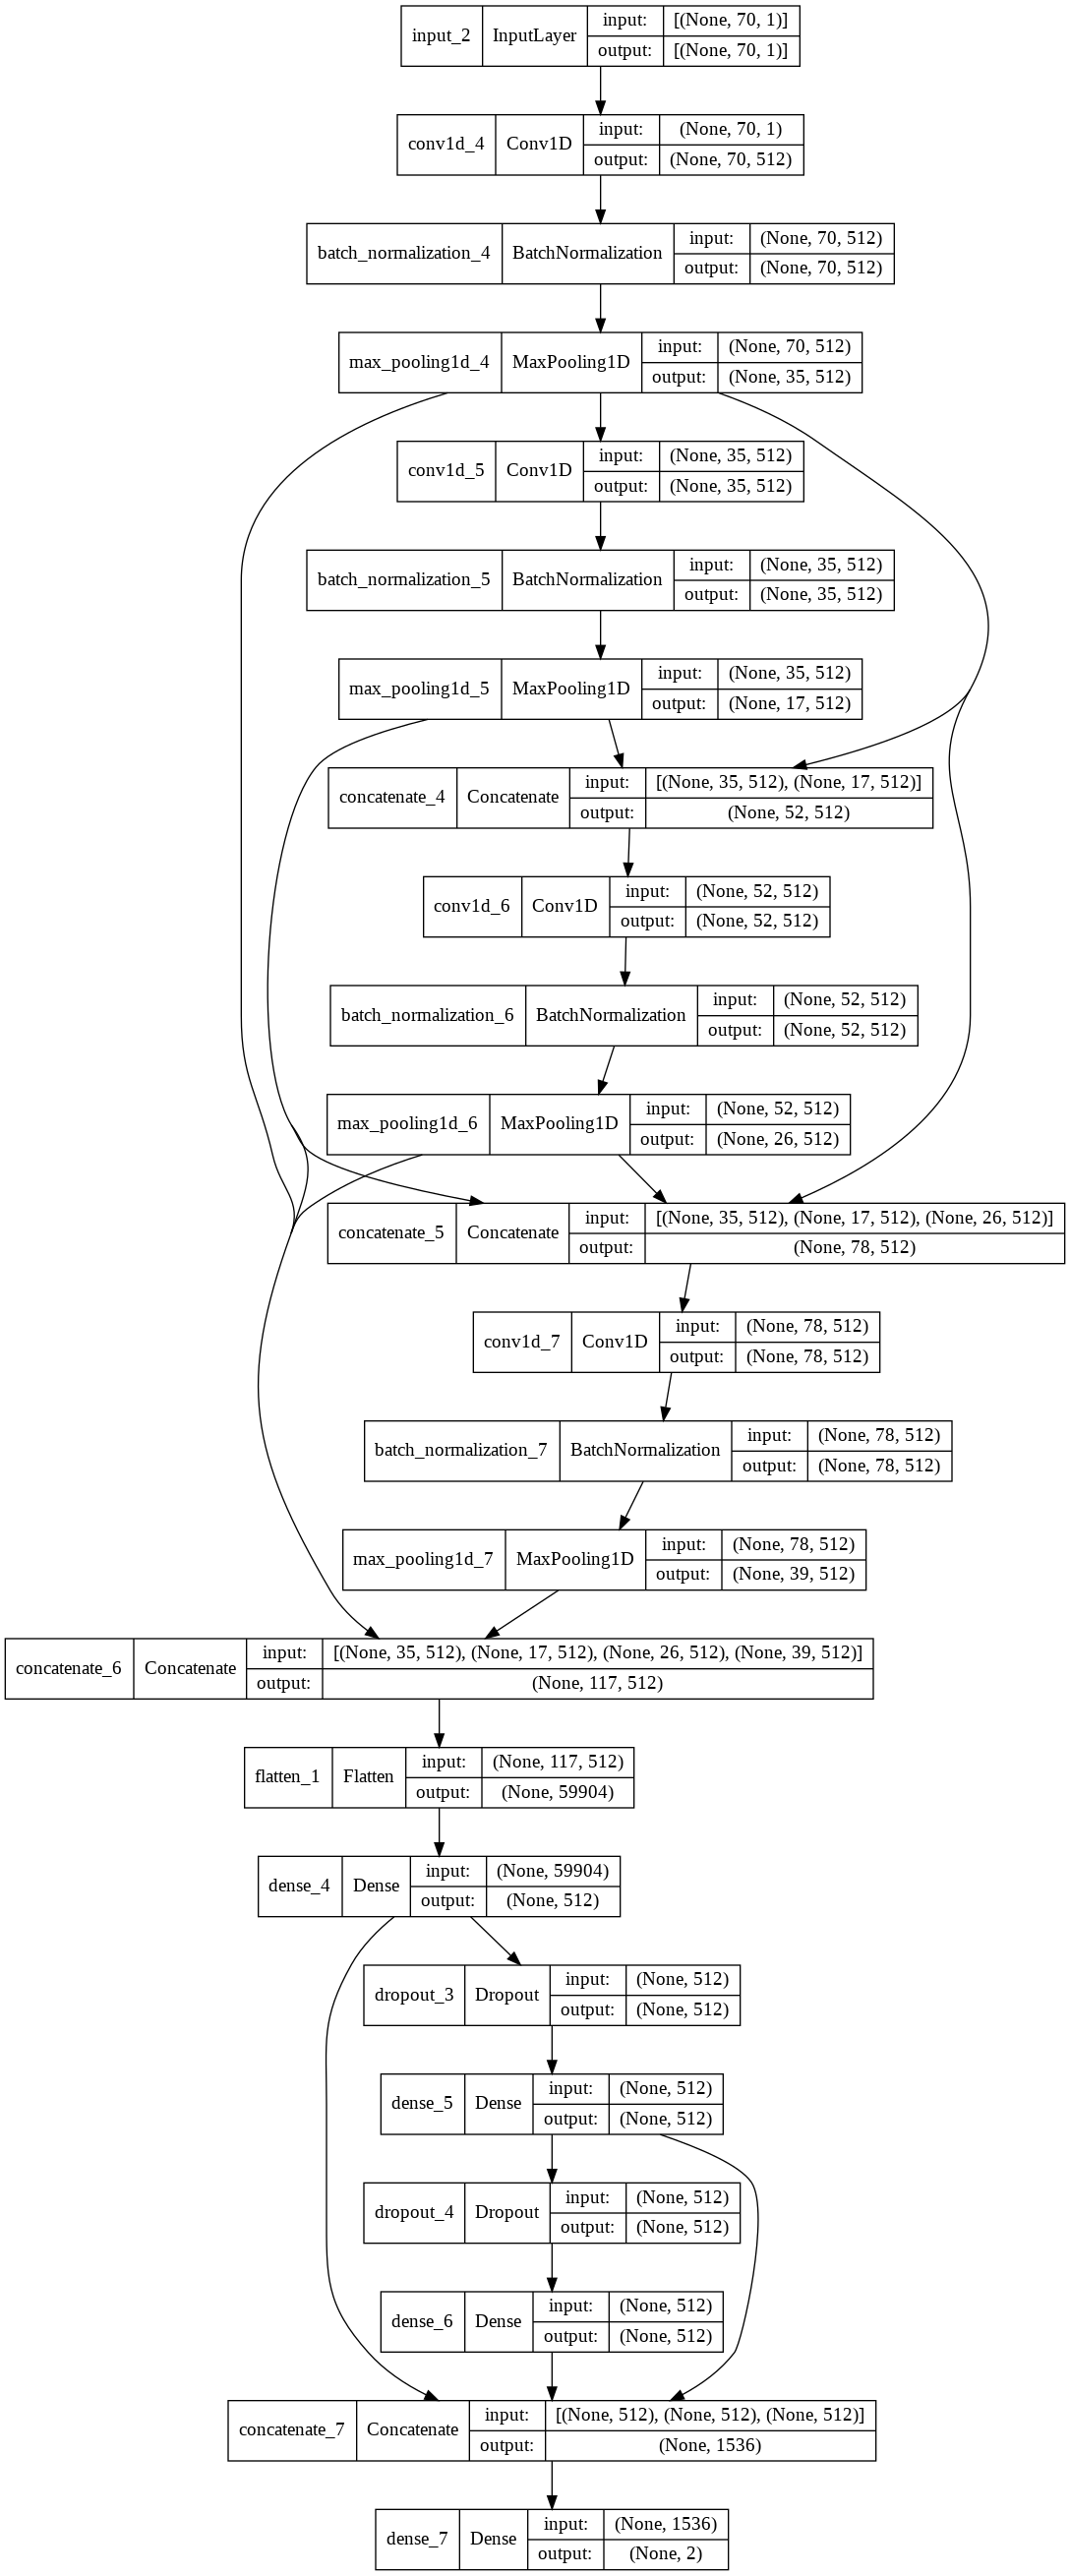

In [ ]:
from keras.layers import Input
from keras.layers.merge import concatenate
from keras.utils.vis_utils import plot_model


intput_shape=(70, 1) #x_train.shape[1]

input_layer = Input(intput_shape)

conv1 = Conv1D(512, kernel_size=6,padding = 'same',activation='relu') (input_layer)
bn1 = BatchNormalization() (conv1)
pool1 = MaxPooling1D(pool_size=(2)) (bn1)

conv2 = Conv1D(512,kernel_size=6,padding = 'same', activation='relu') (pool1)
bn2 = BatchNormalization() (conv2) 
pool2 = MaxPooling1D(pool_size=(2)) (bn2)

connect1 = concatenate([pool1, pool2], axis=1)

conv3 = Conv1D(512,kernel_size=6,padding = 'same', activation='relu') (connect1)
bn3 = BatchNormalization() (conv3)
pool3 = MaxPooling1D(pool_size=(2)) (bn3)

connect2 = concatenate([pool1, pool2, pool3], axis=1)

conv4 = Conv1D(512,kernel_size=6,padding = 'same', activation='relu') (connect2)
bn4 = BatchNormalization() (conv4)
pool4 = MaxPooling1D(pool_size=(2)) (bn4)

connect3 = concatenate([pool1, pool2, pool3, pool4], axis=1)

flat = Flatten() (connect3)

dense1 = Dense(512, activation='relu') (flat)
drop1 = Dropout(0.3) (dense1)

dense2 = Dense(512, activation='relu') (drop1)
drop2 = Dropout(0.3) (dense2)

dense3 = Dense(512, activation='relu') (drop2)
drop3 = Dropout(0.3) (dense3)

connect4 = concatenate([dense1, dense2, dense3])

output_layer = Dense(2, activation='softmax') (connect4) #num_classes

model = Model(
    inputs = input_layer, 
    outputs = output_layer)
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer='adam',
              metrics=['accuracy'])

# Model 4


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 70, 1)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 70, 2048)     8192        ['input_1[0][0]']                
                                                                                                  
 spatial_dropout1d (SpatialDrop  (None, 70, 2048)    0           ['conv1d[0][0]']                 
 out1D)                                                                                           
                                                                                                  
 batch_normalization (BatchNorm  (None, 70, 2048)    8192        ['spatial_dropout1d[0][0]']  

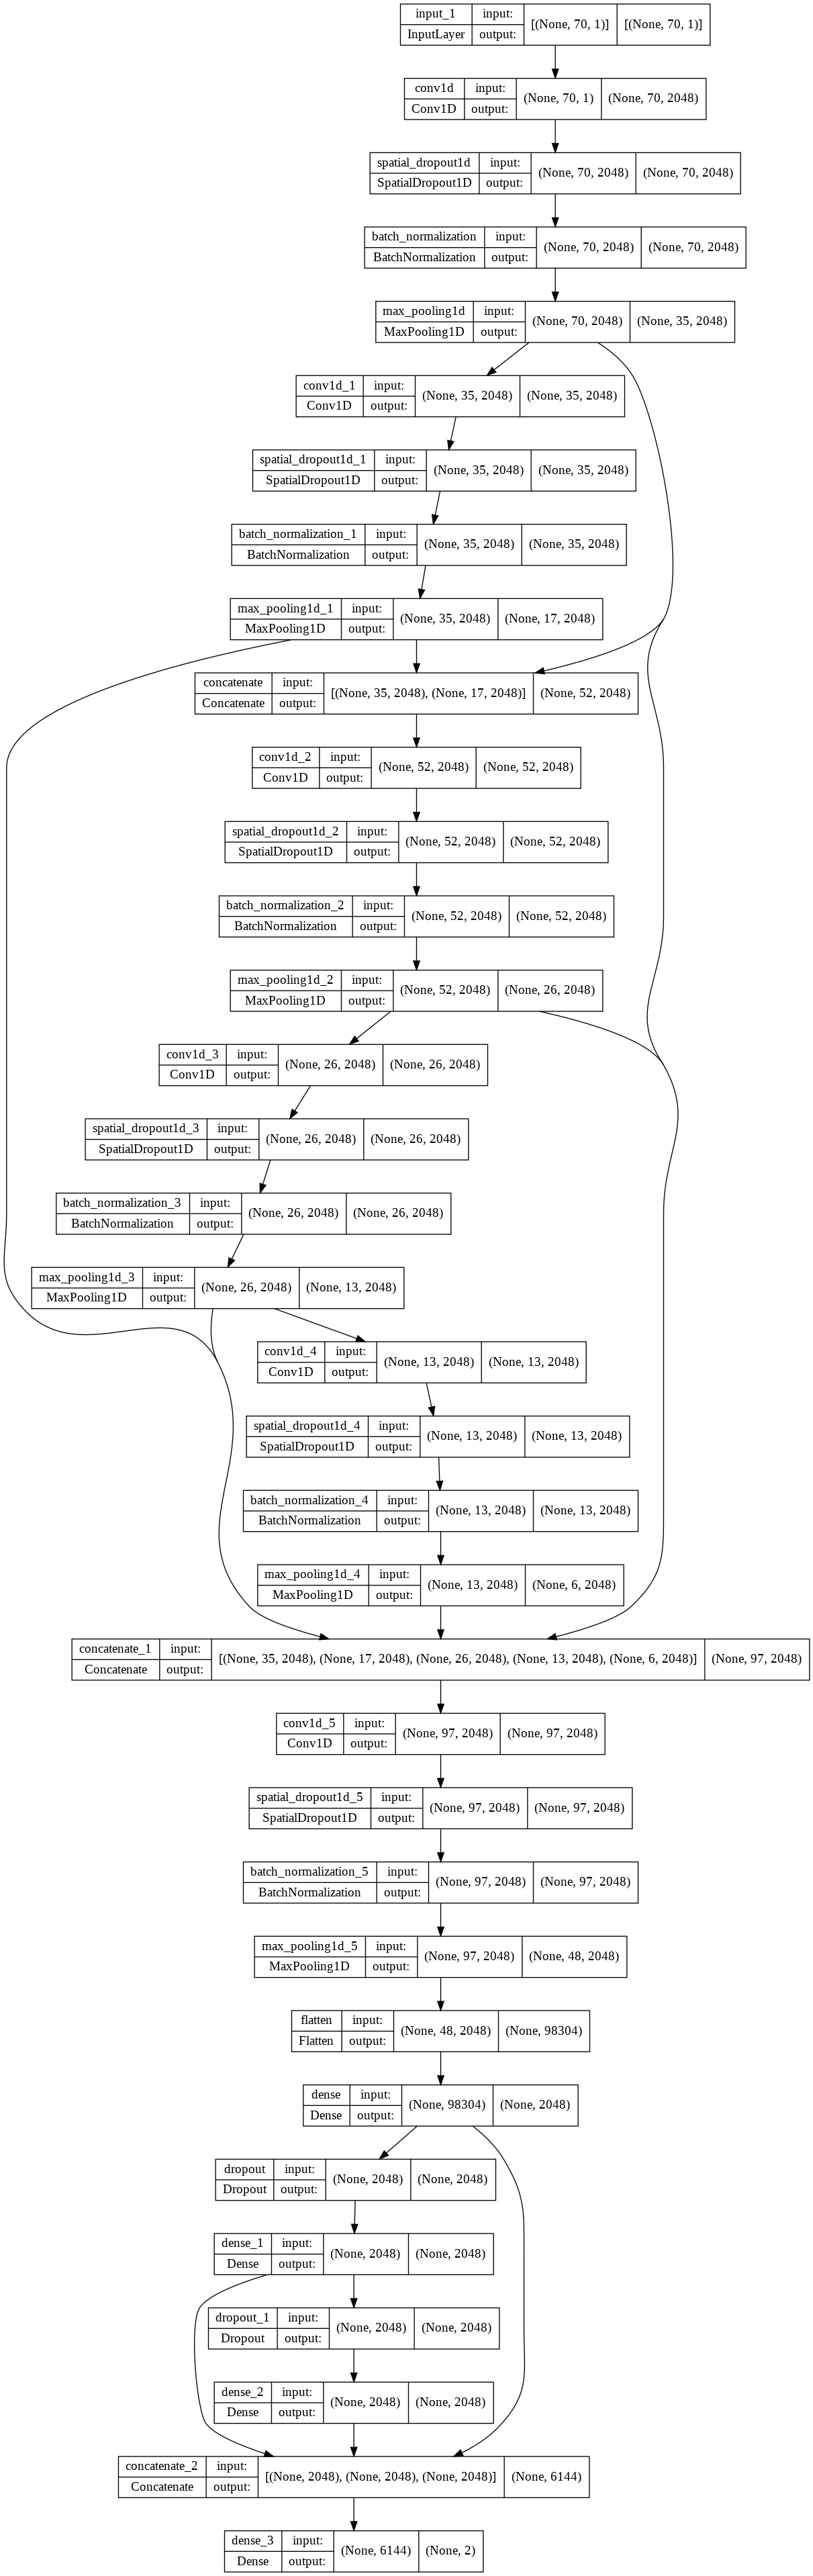

In [ ]:
from keras.layers import Input
from keras.layers.merge import concatenate
from keras.utils.vis_utils import plot_model
from keras.layers import SpatialDropout1D


intput_shape=(70, 1) #x_train.shape[1]

input_layer = Input(intput_shape)

conv1 = Conv1D(2048, kernel_size=3,padding = 'same',activation='relu') (input_layer)
drop1 = SpatialDropout1D(0.3) (conv1)
bn1 = BatchNormalization() (drop1)
pool1 = MaxPooling1D(pool_size=(2)) (bn1)

conv2 = Conv1D(2048,kernel_size=3,padding = 'same', activation='relu') (pool1)
drop2 = SpatialDropout1D(0.3) (conv2)
bn2 = BatchNormalization() (drop2) 
pool2 = MaxPooling1D(pool_size=(2)) (bn2)

connect1 = concatenate([pool1, pool2], axis=1)

conv3 = Conv1D(2048,kernel_size=3,padding = 'same', activation='relu') (connect1)
drop3 = SpatialDropout1D(0.3) (conv3)
bn3 = BatchNormalization() (drop3)
pool3 = MaxPooling1D(pool_size=(2)) (bn3)

conv4 = Conv1D(2048,kernel_size=3,padding = 'same', activation='relu') (pool3)
drop4 = SpatialDropout1D(0.3) (conv4)
bn4 = BatchNormalization() (drop4)
pool4 = MaxPooling1D(pool_size=(2)) (bn4)

conv5 = Conv1D(2048,kernel_size=3,padding = 'same', activation='relu') (pool4)
drop5 = SpatialDropout1D(0.3) (conv5)
bn5 = BatchNormalization() (drop5)
pool5 = MaxPooling1D(pool_size=(2)) (bn5)

connect2 = concatenate([pool1, pool2, pool3, pool4, pool5], axis=1)

conv6 = Conv1D(2048,kernel_size=6,padding = 'same', activation='relu') (connect2)
drop6 = SpatialDropout1D(0.3) (conv6)
bn6 = BatchNormalization() (drop6)
pool6 = MaxPooling1D(pool_size=(2)) (bn6)

flat = Flatten() (pool6)

dense1 = Dense(2048, activation='relu') (flat)
drop1 = Dropout(0.4) (dense1)

dense2 = Dense(2048, activation='relu') (drop1)
drop2 = Dropout(0.4) (dense2)

dense3 = Dense(2048, activation='relu') (drop2)
drop3 = Dropout(0.4) (dense3)

connect4 = concatenate([dense1, dense2, dense3])

output_layer = Dense(2, activation='softmax') (connect4) #num_classes

model = Model(input_layer, output_layer)
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer='adam',
              metrics=['accuracy'])

# Automatic save 
**We have saved all the details of every epoch in google drive so that we can use this when we need.**


automatic save for relieff_1to12_electrodes

In [ ]:
# check points and early stopping
from keras.callbacks import ModelCheckpoint,EarlyStopping

model_name = ""
filepath="/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/mRMR_1to12_electrodes/validation_extra_run/"  + model_name + "weights-improvement-{epoch:02d}-{accuracy:.4f}.hdf5"
print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=25)
callbacks_list = [es, checkpoint]

/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/mRMR_1to12_electrodes/validation_extra_run/weights-improvement-{epoch:02d}-{accuracy:.4f}.hdf5


automatic save for Model 2

In [ ]:
# check points and early stopping
from keras.callbacks import ModelCheckpoint,EarlyStopping

model_name = ""
filepath="/content/drive/Shareddrives/DEAP EEG/Models Saved/Valence/Residual_Connection_2_100_epoch/1st_run/"  + model_name + "weights-improvement-{epoch:02d}-{accuracy:.4f}.hdf5"
print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=25)
callbacks_list = [es, checkpoint]

/content/drive/Shareddrives/DEAP EEG/Models Saved/Valence/Residual_Connection_2_100_epoch/1st_run/weights-improvement-{epoch:02d}-{accuracy:.4f}.hdf5


automatic save for Model 3

In [ ]:
# check points and early stopping
from keras.callbacks import ModelCheckpoint,EarlyStopping

model_name = ""
filepath="/content/drive/Shareddrives/DEAP EEG/Models Saved/Valence/Example 3.2/100_epochs/"  + model_name + "weights-improvement-{epoch:02d}-{accuracy:.4f}.hdf5"
print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=15)
callbacks_list = [es, checkpoint]

/content/drive/Shareddrives/DEAP EEG/Models Saved/Valence/Example 3.2/100_epochs/weights-improvement-{epoch:02d}-{accuracy:.4f}.hdf5


**Automatic save for multitask model only**


automatic save for model 2.4 (multitask learning)

In [ ]:
# check points and early stopping
from keras.callbacks import ModelCheckpoint,EarlyStopping

model_name = ""
filepath="/content/drive/Shareddrives/DEAP EEG/Models Saved/Multitask/documentation_model_2.4_epochs_10/"  + model_name + "weights-improvement-{epoch:02d}.hdf5"
print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=False, mode='auto')
#es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=25)
callbacks_list = [checkpoint]

/content/drive/Shareddrives/DEAP EEG/Models Saved/Multitask/documentation_model_2.4_epochs_10/weights-improvement-{epoch:02d}.hdf5


automatic save weights & history for model 2.4 (multitask learning)

In [ ]:
# check points and early stopping
from keras.callbacks import ModelCheckpoint,EarlyStopping

if count==0:
  count=count+1
else:
  dictionary_path = "/content/drive/Shareddrives/DEAP EEG/Models Saved/Multitask/3class_conference/2nd_run_2class/2nd_run_history_2class/" + "history-dictionary-{epoch:02d}"
  with open(dictionary_path, 'wb') as file_pi:
          pickle.dump(H.history, file_pi)

model_name = ""
filepath="/content/drive/Shareddrives/DEAP EEG/Models Saved/Multitask/3class_conference/2nd_run_2class/"  + model_name + "weights-improvement-{epoch:02d}.hdf5"
print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=False, mode='auto')
#es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=25)
callbacks_list = [checkpoint]

/content/drive/Shareddrives/DEAP EEG/Models Saved/Multitask/3class_conference/2nd_run_2class/weights-improvement-{epoch:02d}.hdf5


#Fit the model


fit the model 2 for mRMR_1to12_electrodes

In [ ]:
H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          callbacks= callbacks_list)

Epoch 1/100
1830/1830 [==============================] - ETA: 0s - loss: 0.6169 - accuracy: 0.6472
Epoch 1: accuracy improved from -inf to 0.64723, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/mRMR_1to12_electrodes/weights-improvement-01-0.6472.hdf5
1830/1830 [==============================] - 204s 105ms/step - loss: 0.6169 - accuracy: 0.6472
Epoch 2/100
1830/1830 [==============================] - ETA: 0s - loss: 0.5425 - accuracy: 0.7109
Epoch 2: accuracy improved from 0.64723 to 0.71089, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/mRMR_1to12_electrodes/weights-improvement-02-0.7109.hdf5
1830/1830 [==============================] - 191s 105ms/step - loss: 0.5425 - accuracy: 0.7109
Epoch 3/100
1830/1830 [==============================] - ETA: 0s - loss: 0.4687 - accuracy: 0.7614
Epoch 3: accuracy improved from 0.71089 to 0.76136, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Pa

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 [==============================] - 39s 8ms/step - loss: 0.2219 - accuracy: 0.9610
Test loss: 0.2219284325838089
Test accuracy: 0.9609823226928711


fit the model 2 for mRMR_1to12_electrodes sorted

In [ ]:
H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          callbacks= callbacks_list)

Epoch 1/100
1830/1830 [==============================] - ETA: 0s - loss: 0.6208 - accuracy: 0.6454
Epoch 1: accuracy improved from -inf to 0.64538, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/mRMR_1to12_electrodes/sorted/weights-improvement-01-0.6454.hdf5
1830/1830 [==============================] - 322s 168ms/step - loss: 0.6208 - accuracy: 0.6454
Epoch 2/100
1830/1830 [==============================] - ETA: 0s - loss: 0.5444 - accuracy: 0.7096
Epoch 2: accuracy improved from 0.64538 to 0.70960, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/mRMR_1to12_electrodes/sorted/weights-improvement-02-0.7096.hdf5
1830/1830 [==============================] - 309s 169ms/step - loss: 0.5444 - accuracy: 0.7096
Epoch 3/100
1830/1830 [==============================] - ETA: 0s - loss: 0.4723 - accuracy: 0.7585
Epoch 3: accuracy improved from 0.70960 to 0.75851, saving model to /content/drive/Shareddrives/DEAP EEG/ABC

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 [==============================] - 54s 11ms/step - loss: 0.2543 - accuracy: 0.9620
Test loss: 0.25431162118911743
Test accuracy: 0.9619812965393066


fit the model 2 for relieff_1to12_electrodes

In [ ]:
H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          callbacks= callbacks_list)

Epoch 1/100
1830/1830 [==============================] - ETA: 0s - loss: 0.6220 - accuracy: 0.6448
Epoch 1: accuracy improved from -inf to 0.64483, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/relieff_1to12_electrodes/weights-improvement-01-0.6448.hdf5
1830/1830 [==============================] - 197s 106ms/step - loss: 0.6220 - accuracy: 0.6448
Epoch 2/100
1830/1830 [==============================] - ETA: 0s - loss: 0.5506 - accuracy: 0.7051
Epoch 2: accuracy improved from 0.64483 to 0.70507, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/relieff_1to12_electrodes/weights-improvement-02-0.7051.hdf5
1830/1830 [==============================] - 192s 105ms/step - loss: 0.5506 - accuracy: 0.7051
Epoch 3/100
1830/1830 [==============================] - ETA: 0s - loss: 0.4763 - accuracy: 0.7561
Epoch 3: accuracy improved from 0.70507 to 0.75610, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Confere

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 [==============================] - 39s 8ms/step - loss: 0.2001 - accuracy: 0.9628
Test loss: 0.20008428394794464
Test accuracy: 0.9627753496170044


In [ ]:
with open('/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/relieff_1to12_electrodes/trainHistoryDict_epoch_100', 'wb') as file_pi:
        pickle.dump(H.history, file_pi)

fit the model 2 for vaishali_4_electrodes

In [ ]:
H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=50,
          verbose=1,
          callbacks= callbacks_list)

Epoch 1/50
1830/1830 [==============================] - ETA: 0s - loss: 0.6457 - accuracy: 0.6175
Epoch 1: accuracy improved from -inf to 0.61748, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/vaishali_et_al_4_electrodes/weights-improvement-01-0.6175.hdf5
1830/1830 [==============================] - 148s 78ms/step - loss: 0.6457 - accuracy: 0.6175
Epoch 2/50
1830/1830 [==============================] - ETA: 0s - loss: 0.6105 - accuracy: 0.6558
Epoch 2: accuracy improved from 0.61748 to 0.65583, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/vaishali_et_al_4_electrodes/weights-improvement-02-0.6558.hdf5
1830/1830 [==============================] - 144s 79ms/step - loss: 0.6105 - accuracy: 0.6558
Epoch 3/50
1830/1830 [==============================] - ETA: 0s - loss: 0.5794 - accuracy: 0.6829
Epoch 3: accuracy improved from 0.65583 to 0.68292, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Confer

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 [==============================] - 39s 8ms/step - loss: 0.4201 - accuracy: 0.9108
Test loss: 0.42010292410850525
Test accuracy: 0.9108222126960754


In [ ]:
with open('/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/vaishali_et_al_4_electrodes/trainHistoryDict_epoch_100', 'wb') as file_pi:
        pickle.dump(H.history, file_pi)

fit the model 2 for zong_valence_8_electrodes

In [ ]:
H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=50,
          verbose=1,
          callbacks= callbacks_list)

Epoch 1/50
1830/1830 [==============================] - ETA: 0s - loss: 0.6291 - accuracy: 0.6336
Epoch 1: accuracy improved from -inf to 0.63365, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/zong_valence_8_electrodes/weights-improvement-01-0.6336.hdf5
1830/1830 [==============================] - 157s 78ms/step - loss: 0.6291 - accuracy: 0.6336
Epoch 2/50
1830/1830 [==============================] - ETA: 0s - loss: 0.5701 - accuracy: 0.6886
Epoch 2: accuracy improved from 0.63365 to 0.68859, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/zong_valence_8_electrodes/weights-improvement-02-0.6886.hdf5
1830/1830 [==============================] - 141s 77ms/step - loss: 0.5701 - accuracy: 0.6886
Epoch 3/50
1830/1830 [==============================] - ETA: 0s - loss: 0.5145 - accuracy: 0.7307
Epoch 3: accuracy improved from 0.68859 to 0.73075, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 [==============================] - 40s 8ms/step - loss: 0.2349 - accuracy: 0.9501
Test loss: 0.2348511517047882
Test accuracy: 0.9501280784606934


In [ ]:
with open('/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/zong_valence_8_electrodes/trainHistoryDict_epoch_100', 'wb') as file_pi:
        pickle.dump(H.history, file_pi)

MDPI_ReliefF_10_electrodes

In [ ]:
H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=50,
          verbose=1,
          callbacks= callbacks_list)

Epoch 1/50
1830/1830 [==============================] - ETA: 0s - loss: 0.6251 - accuracy: 0.6354
Epoch 1: accuracy improved from -inf to 0.63539, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/MDPI_ReliefF_10_electrodes/weights-improvement-01-0.6354.hdf5
1830/1830 [==============================] - 170s 86ms/step - loss: 0.6251 - accuracy: 0.6354
Epoch 2/50
1830/1830 [==============================] - ETA: 0s - loss: 0.5607 - accuracy: 0.6957
Epoch 2: accuracy improved from 0.63539 to 0.69568, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/MDPI_ReliefF_10_electrodes/weights-improvement-02-0.6957.hdf5
1830/1830 [==============================] - 158s 86ms/step - loss: 0.5607 - accuracy: 0.6957
Epoch 3/50
1830/1830 [==============================] - ETA: 0s - loss: 0.4928 - accuracy: 0.7447
Epoch 3: accuracy improved from 0.69568 to 0.74467, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conferen

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 [==============================] - 34s 7ms/step - loss: 0.1973 - accuracy: 0.9567
Test loss: 0.1972552239894867
Test accuracy: 0.95673668384552


In [ ]:
with open('/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/MDPI_ReliefF_10_electrodes/trainHistoryDict_epoch_100', 'wb') as file_pi:
        pickle.dump(H.history, file_pi)

MDPI_NCA_10_electrodes

In [ ]:
H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=50,
          verbose=1,
          callbacks= callbacks_list)

Epoch 1/50
1830/1830 [==============================] - ETA: 0s - loss: 0.6307 - accuracy: 0.6335
Epoch 1: accuracy improved from -inf to 0.63351, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/MDPI_NCA_10_electrodes/weights-improvement-01-0.6335.hdf5
1830/1830 [==============================] - 176s 87ms/step - loss: 0.6307 - accuracy: 0.6335
Epoch 2/50
1830/1830 [==============================] - ETA: 0s - loss: 0.5702 - accuracy: 0.6895
Epoch 2: accuracy improved from 0.63351 to 0.68953, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/MDPI_NCA_10_electrodes/weights-improvement-02-0.6895.hdf5
1830/1830 [==============================] - 157s 86ms/step - loss: 0.5702 - accuracy: 0.6895
Epoch 3/50
1830/1830 [==============================] - ETA: 0s - loss: 0.5105 - accuracy: 0.7334
Epoch 3: accuracy improved from 0.68953 to 0.73340, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 [==============================] - 36s 7ms/step - loss: 0.2283 - accuracy: 0.9551
Test loss: 0.22828903794288635
Test accuracy: 0.9551485776901245


In [ ]:
with open('/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/MDPI_NCA_10_electrodes/trainHistoryDict_epoch_100', 'wb') as file_pi:
        pickle.dump(H.history, file_pi)

FP1

In [ ]:
H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=50,
          verbose=1,
          callbacks= callbacks_list)

Epoch 1/50
1829/1830 [============================>.] - ETA: 0s - loss: 0.6848 - accuracy: 0.5658
Epoch 1: accuracy improved from -inf to 0.56581, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/FP1/weights-improvement-01-0.5658.hdf5
1830/1830 [==============================] - 94s 44ms/step - loss: 0.6848 - accuracy: 0.5658
Epoch 2/50
1830/1830 [==============================] - ETA: 0s - loss: 0.6810 - accuracy: 0.5686
Epoch 2: accuracy improved from 0.56581 to 0.56858, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/FP1/weights-improvement-02-0.5686.hdf5
1830/1830 [==============================] - 79s 43ms/step - loss: 0.6810 - accuracy: 0.5686
Epoch 3/50
1830/1830 [==============================] - ETA: 0s - loss: 0.6809 - accuracy: 0.5687
Epoch 3: accuracy improved from 0.56858 to 0.56866, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/FP1/weights-improvement-0

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 [==============================] - 31s 6ms/step - loss: 0.7515 - accuracy: 0.5827
Test loss: 0.7515133023262024
Test accuracy: 0.5826780200004578


In [ ]:
with open('/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/FP1/trainHistoryDict_epoch_100', 'wb') as file_pi:
        pickle.dump(H.history, file_pi)

IEEE 8 electrodes

In [ ]:
H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=50,
          verbose=1,
          callbacks= callbacks_list)

Epoch 1/50
1830/1830 [==============================] - ETA: 0s - loss: 0.6239 - accuracy: 0.6415
Epoch 1: accuracy improved from -inf to 0.64153, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/IEEE_8electrodes/weights-improvement-01-0.6415.hdf5
1830/1830 [==============================] - 155s 77ms/step - loss: 0.6239 - accuracy: 0.6415
Epoch 2/50
1830/1830 [==============================] - ETA: 0s - loss: 0.5684 - accuracy: 0.6893
Epoch 2: accuracy improved from 0.64153 to 0.68929, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/IEEE_8electrodes/weights-improvement-02-0.6893.hdf5
1830/1830 [==============================] - 139s 76ms/step - loss: 0.5684 - accuracy: 0.6893
Epoch 3/50
1830/1830 [==============================] - ETA: 0s - loss: 0.5170 - accuracy: 0.7282
Epoch 3: accuracy improved from 0.68929 to 0.72820, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weigh

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 [==============================] - 33s 7ms/step - loss: 0.2656 - accuracy: 0.9412
Test loss: 0.265613853931427
Test accuracy: 0.9411949515342712


In [ ]:
with open('/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/IEEE_8electrodes/trainHistoryDict_epoch_100', 'wb') as file_pi:
        pickle.dump(H.history, file_pi)

CNNSE_7_Electrodes

In [ ]:
H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=50,
          verbose=1,
          callbacks= callbacks_list)

Epoch 1/50
1830/1830 [==============================] - ETA: 0s - loss: 0.6323 - accuracy: 0.6345
Epoch 1: accuracy improved from -inf to 0.63446, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/CNNSE_7_Electrodes/weights-improvement-01-0.6345.hdf5
1830/1830 [==============================] - 140s 68ms/step - loss: 0.6323 - accuracy: 0.6345
Epoch 2/50
1830/1830 [==============================] - ETA: 0s - loss: 0.5860 - accuracy: 0.6793
Epoch 2: accuracy improved from 0.63446 to 0.67935, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/CNNSE_7_Electrodes/weights-improvement-02-0.6793.hdf5
1830/1830 [==============================] - 124s 68ms/step - loss: 0.5860 - accuracy: 0.6793
Epoch 3/50
1830/1830 [==============================] - ETA: 0s - loss: 0.5427 - accuracy: 0.7134
Epoch 3: accuracy improved from 0.67935 to 0.71338, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_w

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 [==============================] - 33s 7ms/step - loss: 0.2979 - accuracy: 0.9387
Test loss: 0.2978789508342743
Test accuracy: 0.9387167096138


In [ ]:
with open('/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/CNNSE_7_Electrodes/trainHistoryDict_epoch_100', 'wb') as file_pi:
        pickle.dump(H.history, file_pi)

**for saving history**

In [ ]:
with open('/content/drive/Shareddrives/DEAP EEG/Models Saved/Multitask/3class_conference/2nd_run_2class/2nd_run_history_2class/trainHistoryDict_epoch_100', 'wb') as file_pi:
        pickle.dump(H.history, file_pi)

**For loading history**

In [ ]:
history = pickle.load(open('/content/drive/Shareddrives/DEAP EEG/Models Saved/Multitask/3class_conference/1st_run/trainHistoryDict_epoch_10'), "rb")

All 32 Electrodes

In [ ]:
H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=50,
          verbose=1,
          callbacks= callbacks_list)

Epoch 1/50
1830/1830 [==============================] - ETA: 0s - loss: 0.6190 - accuracy: 0.6462
Epoch 1: accuracy improved from -inf to 0.64616, saving model to //content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/All_32_Electrodes_DEAP/weights-improvement-01-0.6462.hdf5
1830/1830 [==============================] - 425s 224ms/step - loss: 0.6190 - accuracy: 0.6462
Epoch 2/50
1830/1830 [==============================] - ETA: 0s - loss: 0.5265 - accuracy: 0.7210
Epoch 2: accuracy improved from 0.64616 to 0.72095, saving model to //content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/All_32_Electrodes_DEAP/weights-improvement-02-0.7210.hdf5
1830/1830 [==============================] - 410s 224ms/step - loss: 0.5265 - accuracy: 0.7210
Epoch 3/50
1830/1830 [==============================] - ETA: 0s - loss: 0.4253 - accuracy: 0.7871
Epoch 3: accuracy improved from 0.72095 to 0.78711, saving model to //content/drive/Shareddrives/DEAP EEG/ABC Conference 

2nd run of 32 electrodes (21-50)

In [ ]:
from keras.models import load_model
model_loaded = load_model('/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/All_32_Electrodes_DEAP/weights-improvement-20-0.9813.hdf5')

In [ ]:
H = model_loaded.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=30,
          verbose=1,
          callbacks= callbacks_list)

Epoch 1/30
1830/1830 [==============================] - ETA: 0s - loss: 0.0470 - accuracy: 0.9822
Epoch 1: accuracy improved from -inf to 0.98218, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/All_32_Electrodes_DEAP/2nd run (21-50)/weights-improvement-01-0.9822.hdf5
1830/1830 [==============================] - 420s 223ms/step - loss: 0.0470 - accuracy: 0.9822
Epoch 2/30
1830/1830 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9833
Epoch 2: accuracy improved from 0.98218 to 0.98334, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/All_32_Electrodes_DEAP/2nd run (21-50)/weights-improvement-02-0.9833.hdf5
1830/1830 [==============================] - 408s 223ms/step - loss: 0.0439 - accuracy: 0.9833
Epoch 3/30
1830/1830 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9841
Epoch 3: accuracy improved from 0.98334 to 0.98411, saving model to /content/drive/Shareddr

In [ ]:
score = model_loaded.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 [==============================] - 56s 11ms/step - loss: 0.1296 - accuracy: 0.9734
Test loss: 0.1295534074306488
Test accuracy: 0.973437488079071


In [ ]:
with open('/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/All_32_Electrodes_DEAP/trainHistoryDict_epoch_100', 'wb') as file_pi:
        pickle.dump(H.history, file_pi)

Parietal 9 electrodes

In [ ]:
H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=50,
          verbose=1,
          callbacks= callbacks_list)

Epoch 1/50
1830/1830 [==============================] - ETA: 0s - loss: 0.6276 - accuracy: 0.6371
Epoch 1: accuracy improved from -inf to 0.63714, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/Parietal_9_electrodes/weights-improvement-01-0.6371.hdf5
1830/1830 [==============================] - 154s 83ms/step - loss: 0.6276 - accuracy: 0.6371
Epoch 2/50
1830/1830 [==============================] - ETA: 0s - loss: 0.5755 - accuracy: 0.6870
Epoch 2: accuracy improved from 0.63714 to 0.68699, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/Parietal_9_electrodes/weights-improvement-02-0.6870.hdf5
1830/1830 [==============================] - 150s 82ms/step - loss: 0.5755 - accuracy: 0.6870
Epoch 3/50
1830/1830 [==============================] - ETA: 0s - loss: 0.5188 - accuracy: 0.7287
Epoch 3: accuracy improved from 0.68699 to 0.72873, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/m

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 [==============================] - 40s 8ms/step - loss: 0.2620 - accuracy: 0.9493
Test loss: 0.26195666193962097
Test accuracy: 0.9492699503898621


In [ ]:
with open('/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/Parietal_9_electrodes/trainHistoryDict_epoch_100', 'wb') as file_pi:
        pickle.dump(H.history, file_pi)

Temporal 2 electrodes

In [ ]:
H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=50,
          verbose=1,
          callbacks= callbacks_list)

Epoch 1/50
1829/1830 [============================>.] - ETA: 0s - loss: 0.6746 - accuracy: 0.5775
Epoch 1: accuracy improved from -inf to 0.57752, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/Temporal_2_electrodes/weights-improvement-01-0.5775.hdf5
1830/1830 [==============================] - 80s 36ms/step - loss: 0.6746 - accuracy: 0.5775
Epoch 2/50
1830/1830 [==============================] - ETA: 0s - loss: 0.6595 - accuracy: 0.6004
Epoch 2: accuracy improved from 0.57752 to 0.60037, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/Temporal_2_electrodes/weights-improvement-02-0.6004.hdf5
1830/1830 [==============================] - 68s 37ms/step - loss: 0.6595 - accuracy: 0.6004
Epoch 3/50
1830/1830 [==============================] - ETA: 0s - loss: 0.6500 - accuracy: 0.6153
Epoch 3: accuracy improved from 0.60037 to 0.61529, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/mod

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 [==============================] - 27s 6ms/step - loss: 0.6873 - accuracy: 0.8022
Test loss: 0.6872773766517639
Test accuracy: 0.8022412657737732


In [ ]:
with open('/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/Temporal_2_electrodes/trainHistoryDict_epoch_100', 'wb') as file_pi:
        pickle.dump(H.history, file_pi)

**Run mRMR 12 optimal electrode to generate validation graph**

In [ ]:
H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=50,
          verbose=1,
          callbacks= callbacks_list,
          validation_data=(x_test, y_test))

Epoch 1/50
1830/1830 [==============================] - ETA: 0s - loss: 0.6119 - accuracy: 0.6517
Epoch 1: accuracy improved from -inf to 0.65173, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/mRMR_1to12_electrodes/validation_extra_run/weights-improvement-01-0.6517.hdf5
1830/1830 [==============================] - 358s 188ms/step - loss: 0.6119 - accuracy: 0.6517 - val_loss: 0.5631 - val_accuracy: 0.6922
Epoch 2/50
1830/1830 [==============================] - ETA: 0s - loss: 0.5338 - accuracy: 0.7180
Epoch 2: accuracy improved from 0.65173 to 0.71799, saving model to /content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/mRMR_1to12_electrodes/validation_extra_run/weights-improvement-02-0.7180.hdf5
1830/1830 [==============================] - 341s 186ms/step - loss: 0.5338 - accuracy: 0.7180 - val_loss: 0.4914 - val_accuracy: 0.7468
Epoch 3/50
1830/1830 [==============================] - ETA: 0s - loss: 0.4563 - accuracy: 0.7704

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 [==============================] - 53s 11ms/step - loss: 0.2022 - accuracy: 0.9579
Test loss: 0.20215913653373718
Test accuracy: 0.9579149484634399


In [ ]:
with open('/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/mRMR_1to12_electrodes/validation_extra_run/trainHistoryDict_epoch_100', 'wb') as file_pi:
        pickle.dump(H.history, file_pi)

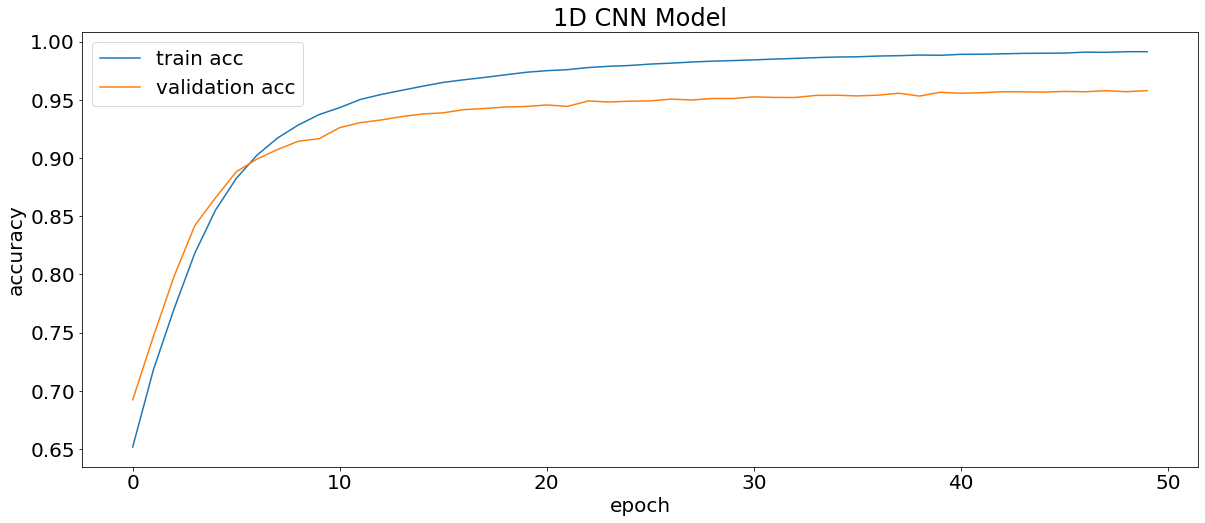

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams["font.size"] = 20

plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('1D CNN Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc', 'validation acc'], loc='upper left')
plt.savefig('1D CNN model 50 epoch train and validation accuracy curve.png', dpi=300)

# Training Graph

##2 Class Multitask Learning

In [5]:
set01 = pickle.load(open('/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/Parietal_9_electrodes/trainHistoryDict_epoch_100', "rb"))

In [6]:
set02 = pickle.load(open('/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/Occipital_5_electrodes/trainHistoryDict_epoch_100', "rb"))

In [8]:
set03 = pickle.load(open('/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/vaishali_et_al_4_electrodes/trainHistoryDict_epoch_100', "rb"))

In [7]:
set04 = pickle.load(open('/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/zong_valence_8_electrodes/trainHistoryDict_epoch_100', "rb"))

In [9]:
set05 = pickle.load(open('/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/MDPI_ReliefF_10_electrodes/trainHistoryDict_epoch_100', "rb"))

In [10]:
set06 = pickle.load(open('/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/MDPI_NCA_10_electrodes/trainHistoryDict_epoch_100', "rb"))

In [11]:
set07 = pickle.load(open('/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/IEEE_8electrodes/trainHistoryDict_epoch_100', "rb"))

In [12]:
set08 = pickle.load(open('/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/Frontal_13_electrodes/trainHistoryDict_epoch_100', "rb"))

**Training accuracy and loss loss graph**

In [13]:
import matplotlib.pyplot as plt

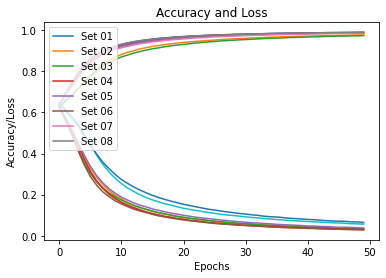

In [ ]:
plt.plot(set01['accuracy'])
plt.plot(set02['accuracy'])
plt.plot(set03['accuracy'])
plt.plot(set04['accuracy'])
plt.plot(set05['accuracy'])
plt.plot(set06['accuracy'])
plt.plot(set07['accuracy'])
plt.plot(set08['accuracy'])

plt.plot(set01['loss'])
plt.plot(set02['loss'])
plt.plot(set03['loss'])
plt.plot(set04['loss'])
plt.plot(set05['loss'])
plt.plot(set06['loss'])
plt.plot(set07['loss'])
plt.plot(set08['loss'])


plt.title('Accuracy and Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epochs')
plt.legend(['Set 01','Set 02','Set 03','Set 04','Set 05','Set 06','Set 07','Set 08'], loc='upper left')
plt.savefig('accuracy and loss for 2 class.png',bbox_inches='tight',dpi=300)
plt.show()

Put legend outside

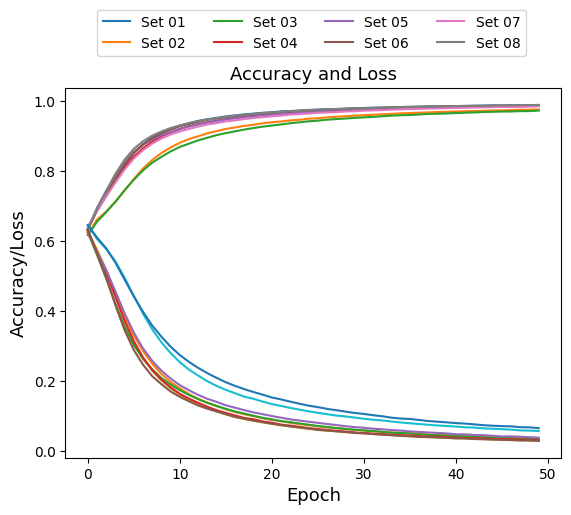

In [34]:
plt.plot(set01['accuracy'])
plt.plot(set02['accuracy'])
plt.plot(set03['accuracy'])
plt.plot(set04['accuracy'])
plt.plot(set05['accuracy'])
plt.plot(set06['accuracy'])
plt.plot(set07['accuracy'])
plt.plot(set08['accuracy'])

plt.plot(set01['loss'])
plt.plot(set02['loss'])
plt.plot(set03['loss'])
plt.plot(set04['loss'])
plt.plot(set05['loss'])
plt.plot(set06['loss'])
plt.plot(set07['loss'])
plt.plot(set08['loss'])


plt.title('Accuracy and Loss', fontsize=13)
plt.ylabel('Accuracy/Loss', fontsize=13)
plt.xlabel('Epoch', fontsize=13)
plt.legend(['Set 01','Set 02','Set 03','Set 04','Set 05','Set 06','Set 07','Set 08'], bbox_to_anchor =(0.05, 1.15), loc='center left', ncol = 4)
plt.savefig('accuracy and loss for 2 class.png',bbox_inches='tight',dpi=300)
plt.show()

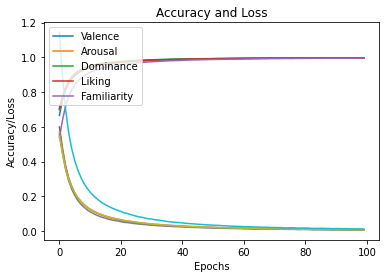

In [ ]:
plt.plot(H.history['valence_accuracy'])
plt.plot(H.history['arousal_accuracy'])
plt.plot(H.history['dominance_accuracy'])
plt.plot(H.history['liking_accuracy'])
plt.plot(H.history['familiarity_accuracy'])

plt.plot(H.history['valence_loss'])
plt.plot(H.history['arousal_loss'])
plt.plot(H.history['dominance_loss'])
plt.plot(H.history['liking_loss'])
plt.plot(H.history['familiarity_loss'])

#plt.plot(history.history['val_acc'])
plt.title('Accuracy and Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epochs')
plt.legend(['Valence', 'Arousal','Dominance','Liking','Familiarity'], loc='upper left')
plt.savefig('accuracy and loss for 2 class.png',bbox_inches='tight',dpi=300)
plt.show()

**Training accuracy graph**

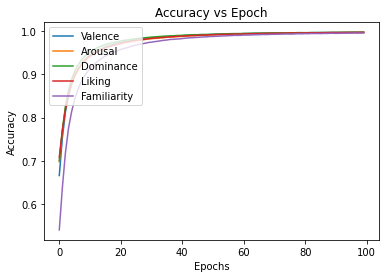

In [ ]:
plt.plot(H.history['valence_accuracy'])
plt.plot(H.history['arousal_accuracy'])
plt.plot(H.history['dominance_accuracy'])
plt.plot(H.history['liking_accuracy'])
plt.plot(H.history['familiarity_accuracy'])

plt.title('Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Valence', 'Arousal','Dominance','Liking','Familiarity'], loc='upper left')
plt.savefig('Accuracy vs Epoch for 2 class.png',bbox_inches='tight',dpi=300)
plt.show()

**Training Loss graph**

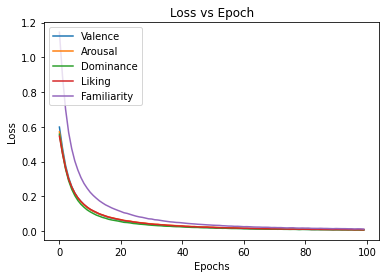

In [ ]:
plt.plot(H.history['valence_loss'])
plt.plot(H.history['arousal_loss'])
plt.plot(H.history['dominance_loss'])
plt.plot(H.history['liking_loss'])
plt.plot(H.history['familiarity_loss'])

#plt.plot(history.history['val_acc'])
plt.title('Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Valence', 'Arousal','Dominance','Liking','Familiarity'], loc='upper left')
plt.savefig('Loss vs Epoch for 2 class.png',bbox_inches='tight',dpi=300)
plt.show()

# Confusion Matrix

##2 Class Multitask Learning

**Create Confusion matrix plotting function**

In [ ]:
from sklearn.utils.multiclass import unique_labels
from matplotlib import pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",fontsize=18,
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

**Valence Confusion matrix plotting function call**

Confusion matrix, without normalization
[[29852  1136]
 [ 1096 38676]]
Normalized confusion matrix
[[0.96 0.04]
 [0.03 0.97]]


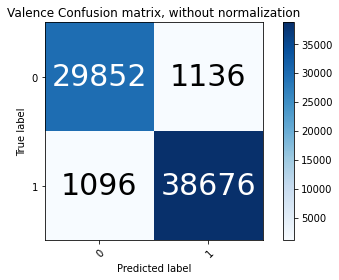

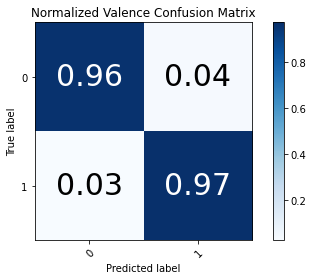

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_test_argmax = y1_test.argmax(axis=1)
y_pred_argmax = y_pred[0].argmax(axis=1)

class_names = np.array([0,1])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names,
                      title='Valence Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names, normalize=True,
                      title='Normalized Valence Confusion Matrix')
plt.savefig('Normalized Valence Confusion Matrix for 2 class.png',bbox_inches='tight',dpi=300)

plt.show()

**Arousal Confusion matrix plotting function call**

Confusion matrix, without normalization
[[27253  1051]
 [ 1000 41456]]
Normalized confusion matrix
[[0.96 0.04]
 [0.02 0.98]]


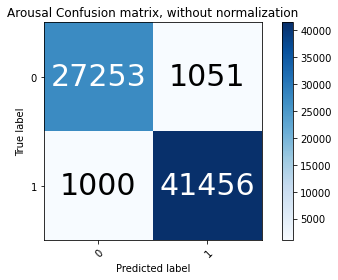

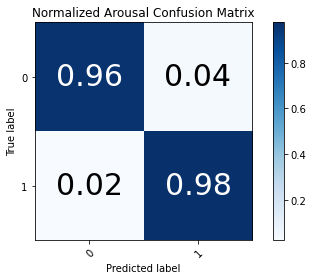

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_test_argmax = y2_test.argmax(axis=1)
y_pred_argmax = y_pred[1].argmax(axis=1)

class_names = np.array([0,1])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names,
                      title='Arousal Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names, normalize=True,
                      title='Normalized Arousal Confusion Matrix')
plt.savefig('Normalized Arousal Confusion Matrix for 2 class.png',bbox_inches='tight',dpi=300)

plt.show()

**Dominance Confusion matrix plotting function call**

Confusion matrix, without normalization
[[26054  1030]
 [  955 42721]]
Normalized confusion matrix
[[0.96 0.04]
 [0.02 0.98]]


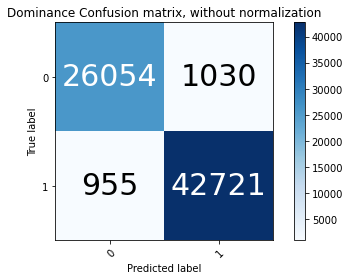

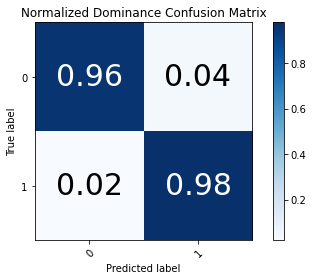

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_test_argmax = y3_test.argmax(axis=1)
y_pred_argmax = y_pred[2].argmax(axis=1)

class_names = np.array([0,1])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names,
                      title='Dominance Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names, normalize=True,
                      title='Normalized Dominance Confusion Matrix')
plt.savefig('Normalized Dominance Confusion Matrix for 2 class.png',bbox_inches='tight',dpi=300)

plt.show()

**Liking Confusion matrix plotting function call**

Confusion matrix, without normalization
[[21987  1132]
 [  969 46672]]
Normalized confusion matrix
[[0.95 0.05]
 [0.02 0.98]]


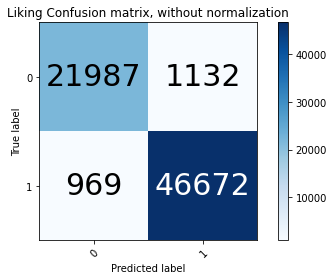

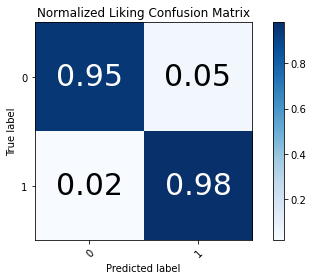

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_test_argmax = y4_test.argmax(axis=1)
y_pred_argmax = y_pred[3].argmax(axis=1)

class_names = np.array([0,1])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names,
                      title='Liking Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names, normalize=True,
                      title='Normalized Liking Confusion Matrix')
plt.savefig('Normalized Liking Confusion Matrix for 2 class.png',bbox_inches='tight',dpi=300)

plt.show()

**Familiarity Confusion matrix plotting function call**

Confusion matrix, without normalization
[[33209   267   245   188   312]
 [  420  9318    86    79   101]
 [  277    73  6245    42    73]
 [  256    75    52  6979    80]
 [  434   133    84    92 11640]]
Normalized confusion matrix
[[0.97 0.01 0.01 0.01 0.01]
 [0.04 0.93 0.01 0.01 0.01]
 [0.04 0.01 0.93 0.01 0.01]
 [0.03 0.01 0.01 0.94 0.01]
 [0.04 0.01 0.01 0.01 0.94]]


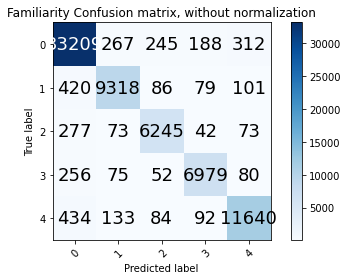

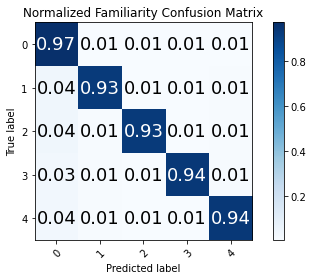

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_test_argmax = y5_test.argmax(axis=1)
y_pred_argmax = y_pred[4].argmax(axis=1)

class_names = np.array([0,1,2,3,4])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names,
                      title='Familiarity Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names, normalize=True,
                      title='Normalized Familiarity Confusion Matrix')
plt.savefig('Normalized Familiarity Confusion Matrix for 2 class.png',bbox_inches='tight',dpi=300)

plt.show()

#Classification Report

##2 Class Multitask Learning

**Valence Classification Report**

In [ ]:
y_true = np.array(y1_test)
y_pred = model.predict(x_test)
y_pred = np.squeeze(y_pred[0])
y_pred = np.array(y_pred >= 0.5, dtype=np.int)

from sklearn.metrics import classification_report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     30988
           1       0.97      0.97      0.97     39772

   micro avg       0.97      0.97      0.97     70760
   macro avg       0.97      0.97      0.97     70760
weighted avg       0.97      0.97      0.97     70760
 samples avg       0.97      0.97      0.97     70760



**Arousal Classification Report**

In [ ]:
y_true = np.array(y2_test)
y_pred = model.predict(x_test)
y_pred = np.squeeze(y_pred[1])
y_pred = np.array(y_pred >= 0.5, dtype=np.int)

from sklearn.metrics import classification_report
print(classification_report(y2_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     28304
           1       0.98      0.98      0.98     42456

   micro avg       0.97      0.97      0.97     70760
   macro avg       0.97      0.97      0.97     70760
weighted avg       0.97      0.97      0.97     70760
 samples avg       0.97      0.97      0.97     70760



**Dominance Classification Report**

In [ ]:
y_true = np.array(y3_test)
y_pred = model.predict(x_test)
y_pred = np.squeeze(y_pred[2])
y_pred = np.array(y_pred >= 0.5, dtype=np.int)

from sklearn.metrics import classification_report
print(classification_report(y3_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     27084
           1       0.98      0.98      0.98     43676

   micro avg       0.97      0.97      0.97     70760
   macro avg       0.97      0.97      0.97     70760
weighted avg       0.97      0.97      0.97     70760
 samples avg       0.97      0.97      0.97     70760



**Liking Classification Report**

In [ ]:
y_true = np.array(y4_test)
y_pred = model.predict(x_test)
y_pred = np.squeeze(y_pred[3])
y_pred = np.array(y_pred >= 0.5, dtype=np.int)

from sklearn.metrics import classification_report
print(classification_report(y4_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     23119
           1       0.98      0.98      0.98     47641

   micro avg       0.97      0.97      0.97     70760
   macro avg       0.97      0.97      0.97     70760
weighted avg       0.97      0.97      0.97     70760
 samples avg       0.97      0.97      0.97     70760



**Familiarity Classification Report**

In [ ]:
y_true = np.array(y5_test)
y_pred = model.predict(x_test)
y_pred = np.squeeze(y_pred[4])
y_pred = np.array(y_pred >= 0.5, dtype=np.int)

from sklearn.metrics import classification_report
print(classification_report(y5_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     34221
           1       0.95      0.93      0.94     10004
           2       0.93      0.93      0.93      6710
           3       0.95      0.94      0.94      7442
           4       0.95      0.94      0.95     12383

   micro avg       0.95      0.95      0.95     70760
   macro avg       0.95      0.94      0.94     70760
weighted avg       0.95      0.95      0.95     70760
 samples avg       0.95      0.95      0.95     70760



## LSTM

frontal

In [ ]:
# LSTM Examples: https://keras.io/examples/nlp/bidirectional_lstm_imdb/
# https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/ 
# LSTM for international airline passengers problem with time step regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# reshape input to be [samples, time steps, features]
#trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
#testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(100, input_shape=(65,1), return_sequences=True))
model.add(LSTM(100))
model.add(Dense(20))
model.add(Dense(2))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=1)

Epoch 1/100
4685/4685 [==============================] - 68s 13ms/step - loss: 0.6833 - accuracy: 0.5725
Epoch 2/100
4685/4685 [==============================] - 54s 11ms/step - loss: 0.6483 - accuracy: 0.6192
Epoch 3/100
4685/4685 [==============================] - 54s 12ms/step - loss: 0.6444 - accuracy: 0.6250
Epoch 4/100
4685/4685 [==============================] - 54s 12ms/step - loss: 0.6508 - accuracy: 0.6153
Epoch 5/100
4685/4685 [==============================] - 53s 11ms/step - loss: 0.6321 - accuracy: 0.6361
Epoch 6/100
4685/4685 [==============================] - 54s 12ms/step - loss: 0.6340 - accuracy: 0.6353
Epoch 7/100
4685/4685 [==============================] - 54s 12ms/step - loss: 0.6270 - accuracy: 0.6431
Epoch 8/100
4685/4685 [==============================] - 57s 12ms/step - loss: 0.6258 - accuracy: 0.6437
Epoch 9/100
4685/4685 [==============================] - 54s 11ms/step - loss: 0.6217 - accuracy: 0.6475
Epoch 10/100
4685/4685 [==============================]

In [ ]:
# save the model to disk
filename = '/content/drive/Shareddrives/DEAP EEG/ABC Conference Paper/model_weights/Frontal_13_electrodes/LSTM/model_save.h5'
model.save(filename)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])